# Overview

1. Load the train and test datasets
2. Get basic information using info() and describe()
3. Data Exploration
4. Feature Engineering and Data Cleaning
5. Data Preprocessing
6. Model Building
7. Model Tuning
8. Additional Ensemble Approaches
9. Model Evaluation
10. Submission Preparation


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Load the train and test datasets**

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **Get basic information about the data**

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
#This is useful when making the submission
passenger_id = test_data.PassengerId

In [9]:
train_data.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

To ensure consistent preprocessing, feature engineering, and encoding while avoiding data leakage,
* I combined train,test datasets and made a single dataset called all_data.
* Marked train and test datasets.
  

In [10]:
# I set test_data['Survived'] = -1 to indicate unknown survival status
# while maintaining structural consistency with the train dataset for preprocessing.
test_data['Survived'] = -1

In [11]:
train_data["train_flag"] = 1  # Marked training data
test_data["train_flag"] = 0   # Marked test data

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
 12  train_flag   418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


In [13]:
test_data['Survived']

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
413   -1
414   -1
415   -1
416   -1
417   -1
Name: Survived, Length: 418, dtype: int64

In [14]:
all_data = pd.concat([train_data, test_data], axis=0)  # Combined along rows

In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_flag   1309 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 143.2+ KB


In [16]:
survived_mean = train_data['Survived'].mean()
survived_mean

0.3838383838383838

# **Data Exploration**

In [17]:
# Categorized the columns into numberical and categorical datasets
all_data_num = all_data[['Age','PassengerId','SibSp','Parch','Fare']]
all_data_cat = all_data[['Pclass','Sex','Ticket','Cabin','Embarked','Survived']]

# **Numerical features**

1. Got the distributions
2. Checked about correlations
3. Checked about the survival rate

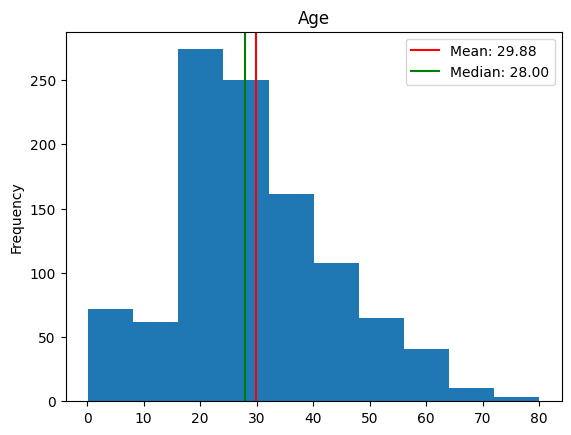

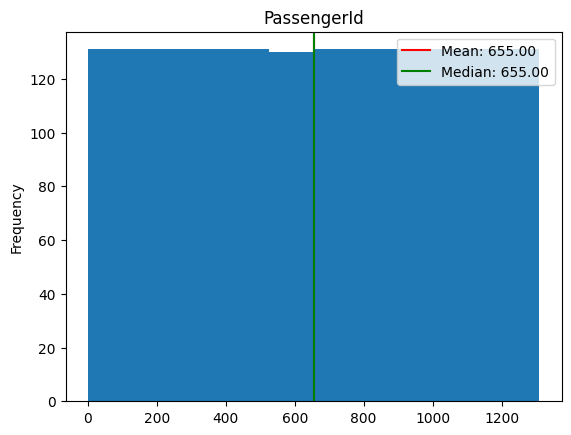

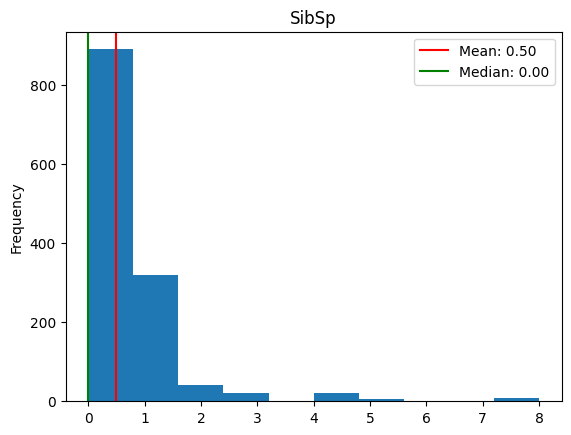

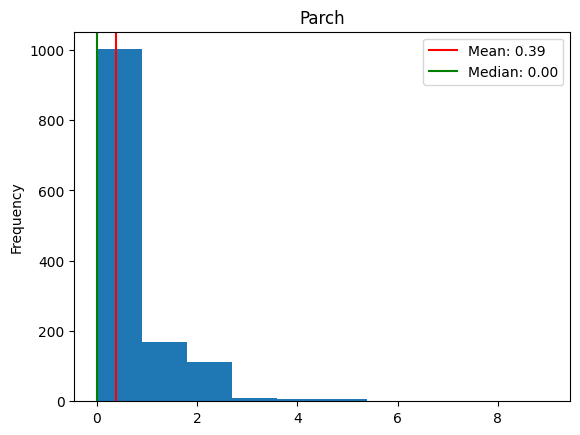

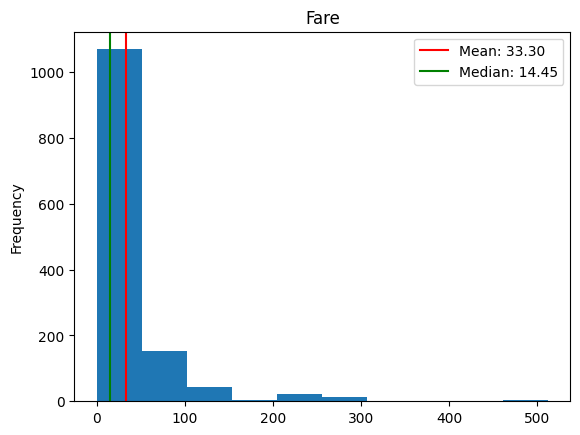

In [18]:
# First I got the distributions of data
for i in all_data_num.columns:
    plt.hist(all_data_num[i])
    mean_data = all_data_num[i].mean()
    median_data = all_data_num[i].median()
    plt.axvline(mean_data,label = f'Mean: {mean_data:.2f}',color = 'red')
    plt.axvline(median_data,label = f'Median: {median_data:.2f}',color = 'green')
    plt.title(i)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

                  Age  PassengerId     SibSp     Parch      Fare
Age          1.000000     0.028814 -0.243699 -0.150917  0.178740
PassengerId  0.028814     1.000000 -0.055224  0.008942  0.031428
SibSp       -0.243699    -0.055224  1.000000  0.373587  0.160238
Parch       -0.150917     0.008942  0.373587  1.000000  0.221539
Fare         0.178740     0.031428  0.160238  0.221539  1.000000


<Axes: >

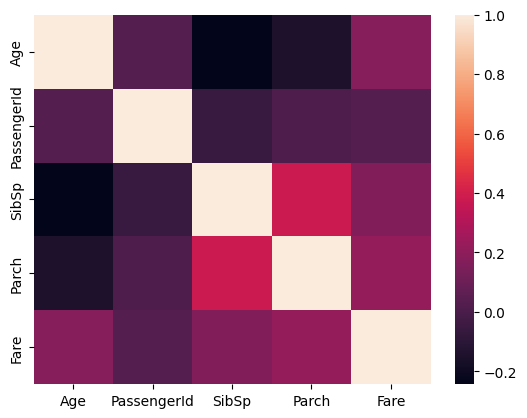

In [19]:
# Next I explored any correlations between the numerical features
print(all_data_num.corr())
sns.heatmap(all_data_num.corr())

In [20]:
# Then I compared the survival rate of numerical features
# PassengerId can be ignored
pivot_num = pd.pivot_table(train_data,index = "Survived",values = ['Age','SibSp','Parch','Fare'])
print(pivot_num)

                Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684


In [21]:
pivot_num.index

Index([0, 1], dtype='int64', name='Survived')

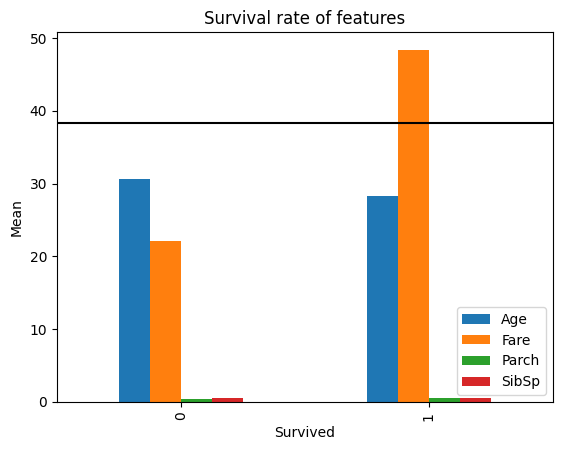

In [22]:
pivot_num.plot(kind = "bar")
plt.title("Survival rate of features")
plt.ylabel("Mean")
plt.axhline(y = survived_mean*100,color = 'black')
plt.show()

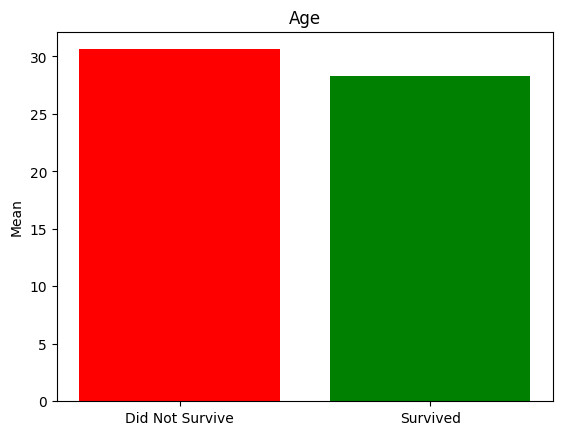

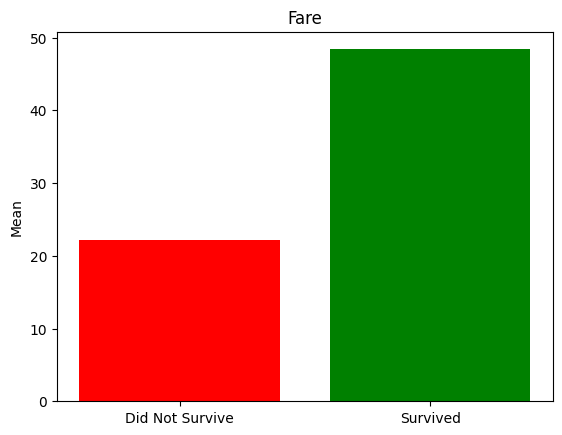

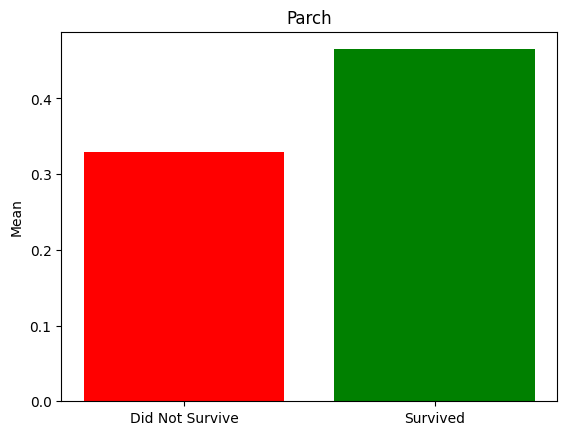

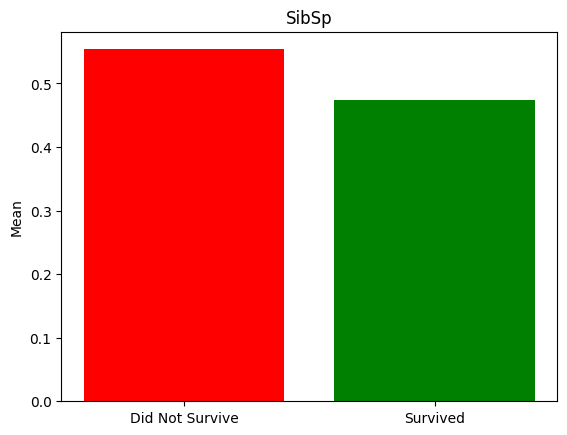

In [23]:
for i in pivot_num.columns:
    plt.bar(pivot_num.index,pivot_num[i],color = ['red','green'])
    plt.title(i)
    plt.xticks(ticks=pivot_num.index, labels=['Did Not Survive', 'Survived'], rotation=0)
    plt.ylabel("Mean")
    plt.show()

**Observations**
* Large amount of rich,young people has been survived.
* People that have higher number of parents and smaller number of siblings has been survived.

**Things have to be done**
* The Parch and SibSp columns have to be modified and need to make a new column called the family size.
* Need to annalyse the distribution,survival rate of family size

# **Categorical features**

1. Got the distributions
2. Checked about correlations
3. Checked about the survival rate

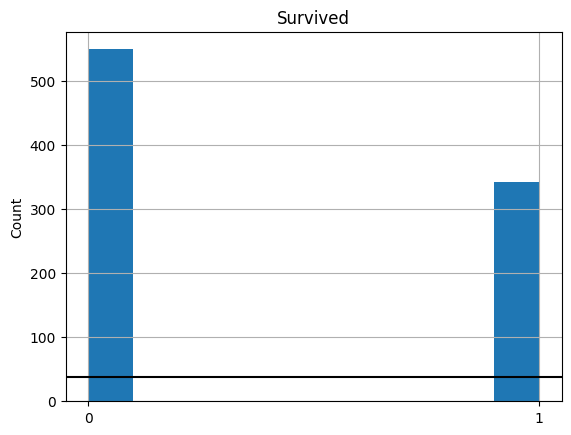

In [24]:
# First I got the distributions of data
train_data['Survived'].hist()
plt.title('Survived')
plt.axhline(y = survived_mean*100,color = 'black')
plt.xticks(ticks=train_data['Survived'].value_counts().index, rotation=0)
plt.ylabel("Count")
plt.show()

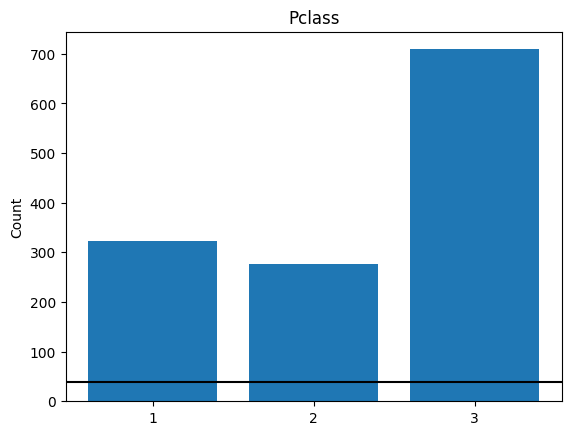

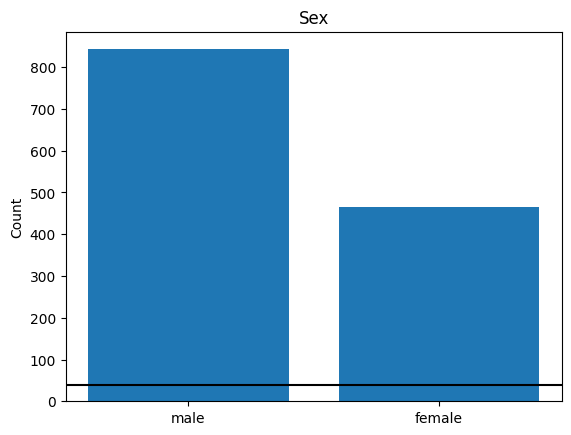

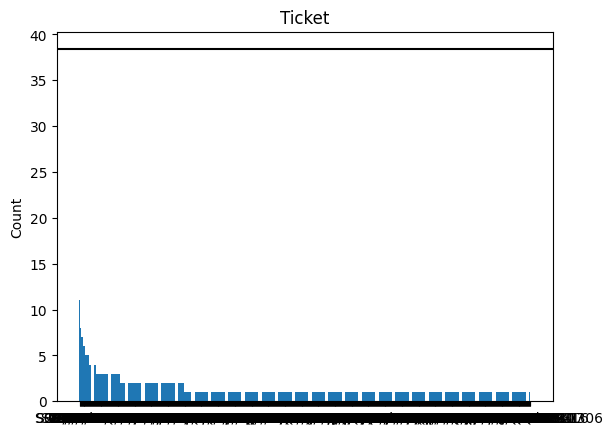

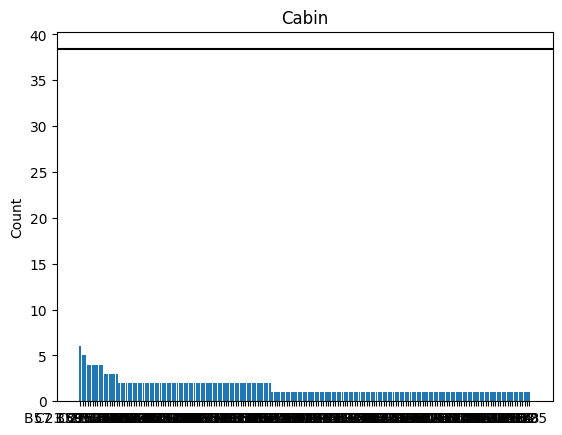

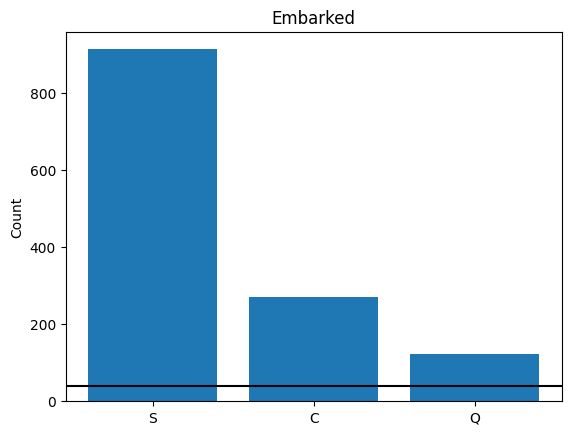

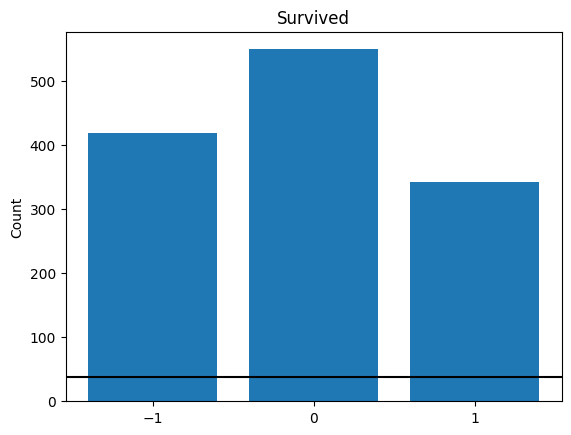

In [25]:
for i in all_data_cat.columns:
    plt.bar(all_data_cat[i].value_counts().index,all_data_cat[i].value_counts())
    plt.title(i)
    plt.axhline(y = survived_mean*100,color = 'black')
    plt.xticks(ticks=all_data_cat[i].value_counts().index, rotation=0)
    plt.ylabel("Count")
    plt.show()

 **Finding correlations between categorical variables**

Used the **Cramer's V** technique to assess the strength of association between two categorical variables.

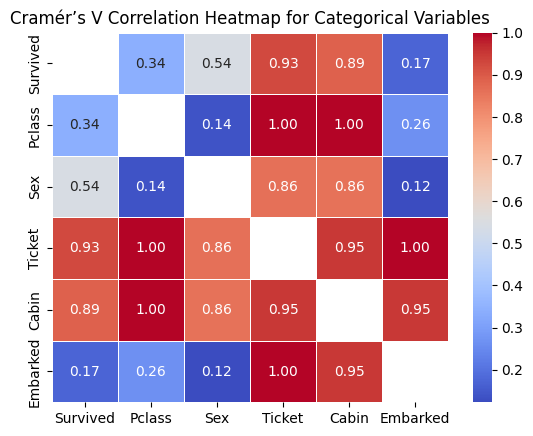

In [26]:
cat_variables = ['Survived','Pclass','Sex','Ticket','Cabin','Embarked']
# Function to calculate Cramér's V
def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

# Create an empty matrix for storing Cramér's V values
correlation_matrix = pd.DataFrame(index=cat_variables, columns=cat_variables)

# Calculate Cramér’s V for all categorical variable pairs
for var1 in cat_variables:
    for var2 in cat_variables:
        if var1 != var2:
            contingency_table = pd.crosstab(train_data[var1], train_data[var2])
            correlation_matrix.loc[var1, var2] = cramers_v(contingency_table)

# Convert the correlation matrix to float
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Cramér’s V Correlation Heatmap for Categorical Variables')
plt.show()


* Ticket
* Pclass
* Embarked
* Cabin have some strong correlations


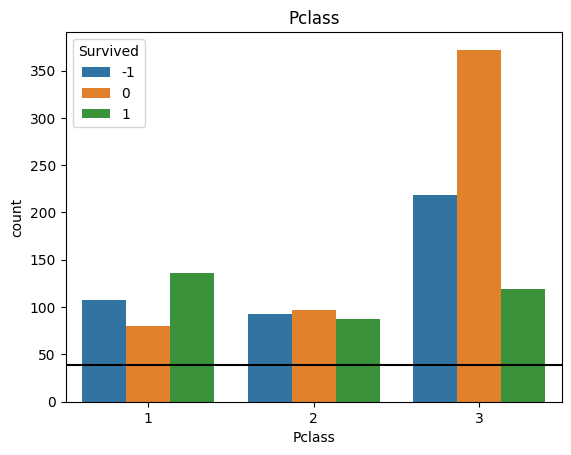

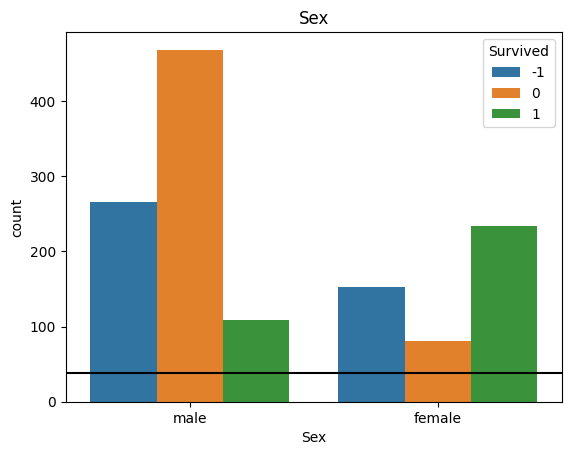

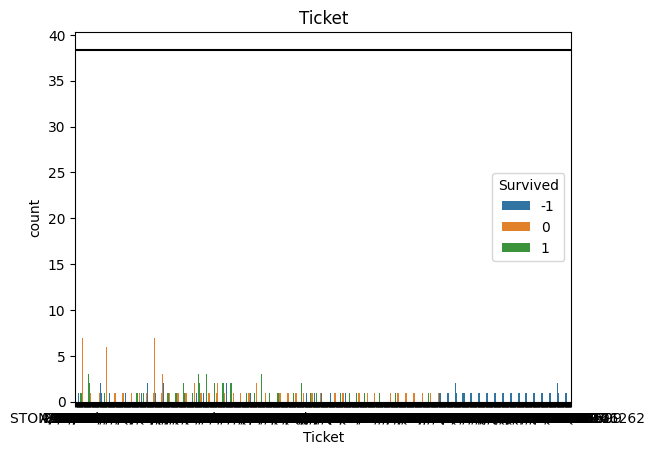

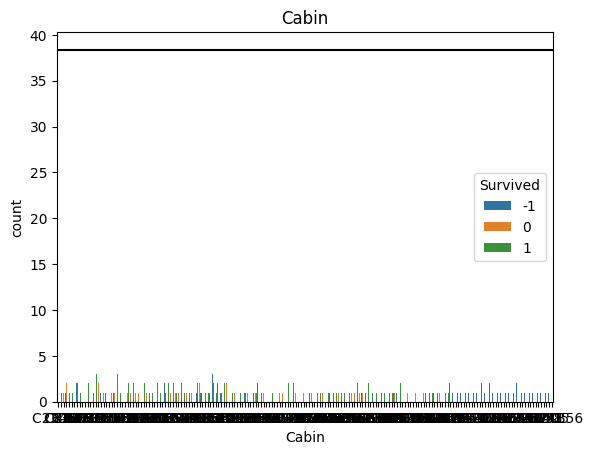

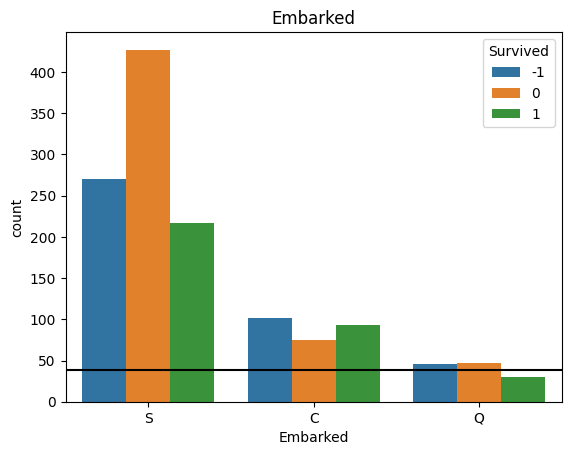

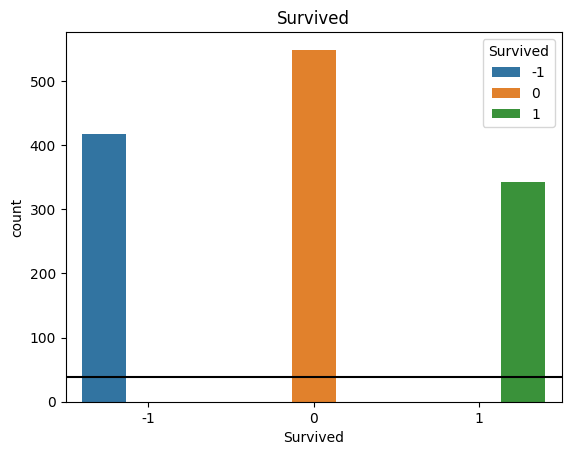

In [27]:
# Comparing survival rates
for i in all_data_cat.columns:
    sns.countplot(x = i,hue = 'Survived',data = all_data_cat)
    plt.title(i)
    plt.axhline(y = survived_mean*100,color = 'black')
    plt.show()

-1 values can be ignored

**Observations**
* A lot of number of people has not survived.
* Each ticket is not unique.
* Cabin and Ticket graphs are so messy.
* Lot of males have died.
* Lot of females have survived.
* Lot of people embarked in S have survived.

**Things have to be done**
* Cabin and Ticket features have to be considered and do some feature engineering.
* I need to perform further correlation analyses and compare survival rates.

# **Feature Engineering and Data Cleaning**

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_flag   1309 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 143.2+ KB


**Family size**

* Made a seperate column called family_size

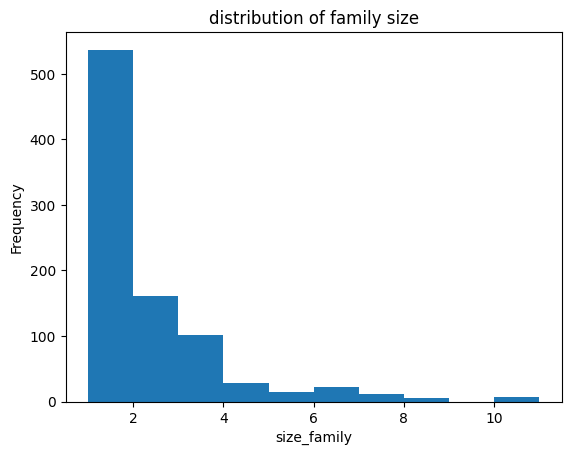

In [29]:
size_family = train_data['SibSp'] + train_data['Parch'] + 1
size_family.plot(kind = 'hist')
plt.xlabel("size_family")
plt.title("distribution of family size")
plt.show()

   size_family  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000


<Axes: xlabel='size_family', ylabel='Survived'>

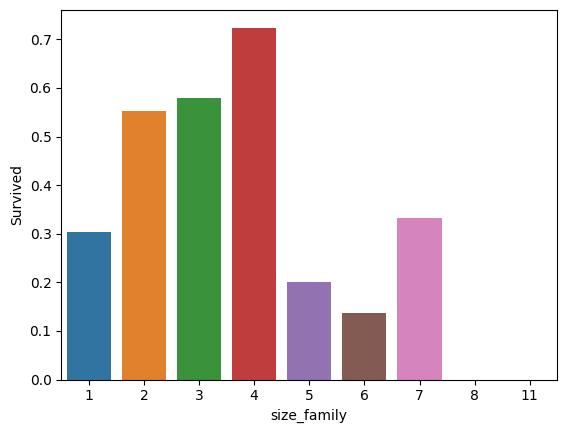

In [30]:
survival_rate = train_data.groupby(size_family)['Survived'].mean().reset_index()
survival_rate.columns = ['size_family', 'Survived']
print(survival_rate)
sns.barplot(x='size_family', y='Survived', data=survival_rate)

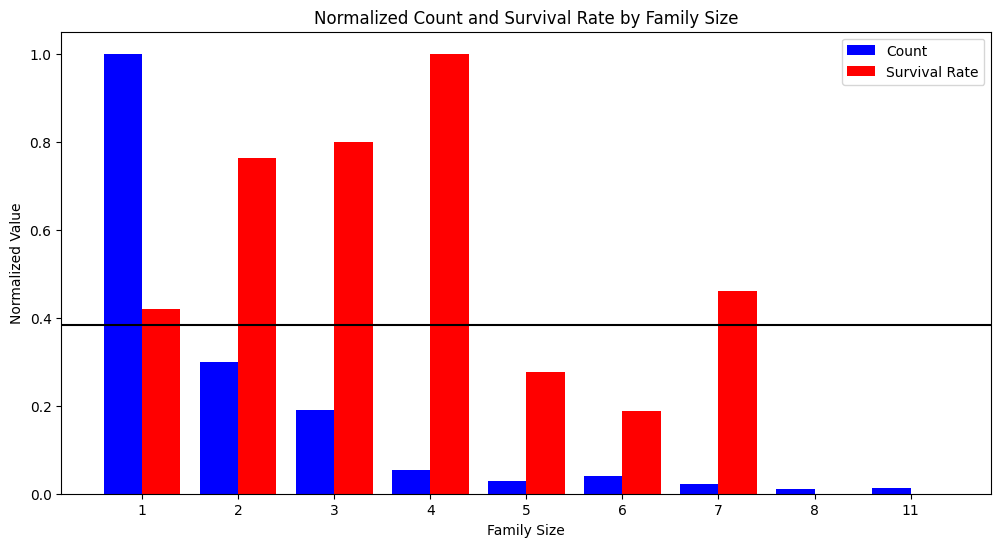

In [31]:
grouped_data = train_data.groupby(size_family).agg({
    'Survived': ['mean', 'count']
}).reset_index()

# Rename columns for clarity
grouped_data.columns = ['size_family', 'Survival Rate', 'Count']

# Normalize the data to the range [0, 1]
count_max = grouped_data['Count'].max()
survival_rate_max = grouped_data['Survival Rate'].max()

# Normalize both counts and survival rates
grouped_data['Normalized Count'] = grouped_data['Count'] / count_max
grouped_data['Normalized Survival Rate'] = grouped_data['Survival Rate'] / survival_rate_max

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width and positions
bar_width = 0.4
x = np.arange(len(grouped_data))

# Bar plots for Normalized Count and Normalized Survival Rate
ax.bar(x - bar_width / 2, grouped_data['Normalized Count'], width=bar_width, label='Count', color='b')
ax.bar(x + bar_width / 2, grouped_data['Normalized Survival Rate'], width=bar_width, label='Survival Rate', color='r')

# Labels and title
ax.set_xlabel('Family Size')
ax.set_ylabel('Normalized Value')
ax.set_title('Normalized Count and Survival Rate by Family Size')
ax.set_xticks(x)
ax.set_xticklabels(grouped_data['size_family'])
plt.axhline(y = survived_mean,color = 'black')
ax.legend()

# Show the plot
plt.show()


Need to categorize this feature into 3 categories
* Small: 0 ≤ family_size < 3
* Medium: 3 ≤ family_size < 6
* Large: family_size ≥ 6

**Ticket**

In [32]:
all_data['Ticket'].value_counts()

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

Extracted the first character of the ticket and put it in a seperate column

In [33]:
ticket_number = all_data['Ticket'].str.replace(" ","").str[0]
ticket_number.value_counts()

Ticket
3    429
2    278
1    210
P     98
S     98
C     77
A     42
W     19
7     13
F     13
4     11
6      9
L      5
5      3
9      2
8      2
Name: count, dtype: int64

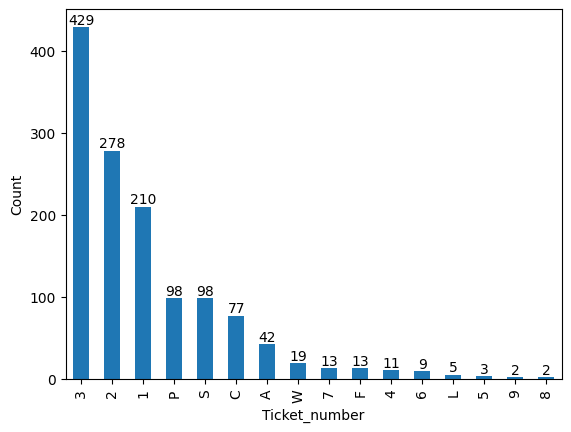

In [34]:
ax = ticket_number.value_counts().plot(kind = "bar")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
plt.xlabel("Ticket_number")
plt.ylabel("Count")
plt.show()


In [35]:
ticket_number_train = train_data['Ticket'].str.replace(" ","").str[0]

   ticket_number  Survival Rate
0              1       0.630137
1              2       0.464481
2              3       0.239203
3              4       0.200000
4              5       0.000000
5              6       0.166667
6              7       0.111111
7              8       0.000000
8              9       1.000000
9              A       0.068966
10             C       0.340426
11             F       0.571429
12             L       0.250000
13             P       0.646154
14             S       0.323077
15             W       0.153846


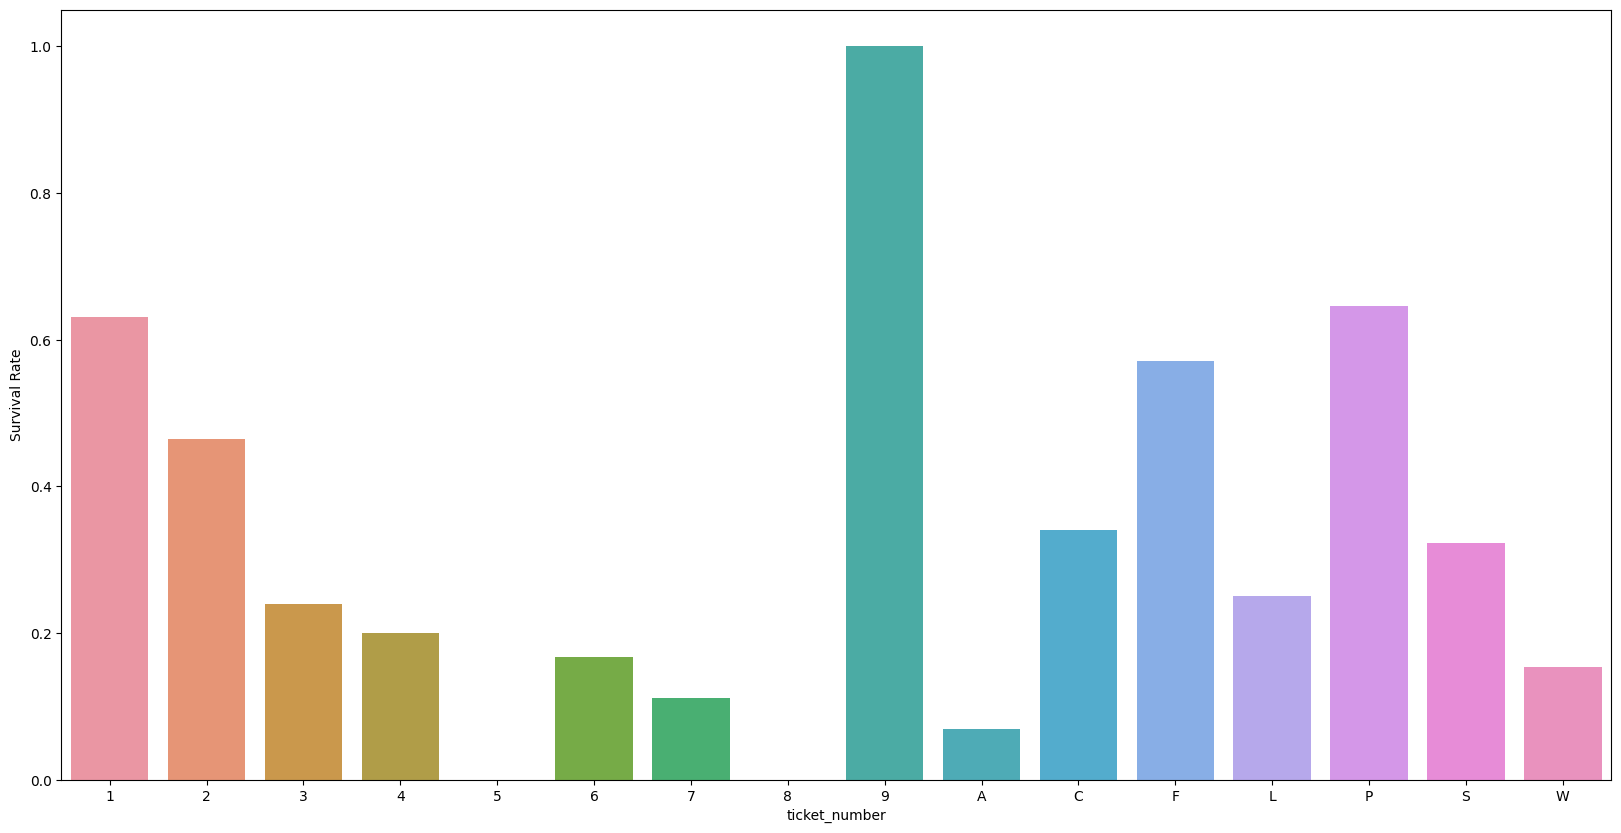

In [36]:
survival_rate_ticket = train_data.groupby(ticket_number_train)['Survived'].mean().reset_index()
survival_rate_ticket.columns = ['ticket_number', 'Survival Rate']
print(survival_rate_ticket)
plt.figure(figsize=(20, 10))
sns.barplot(x='ticket_number', y='Survival Rate', data=survival_rate_ticket)
plt.show()

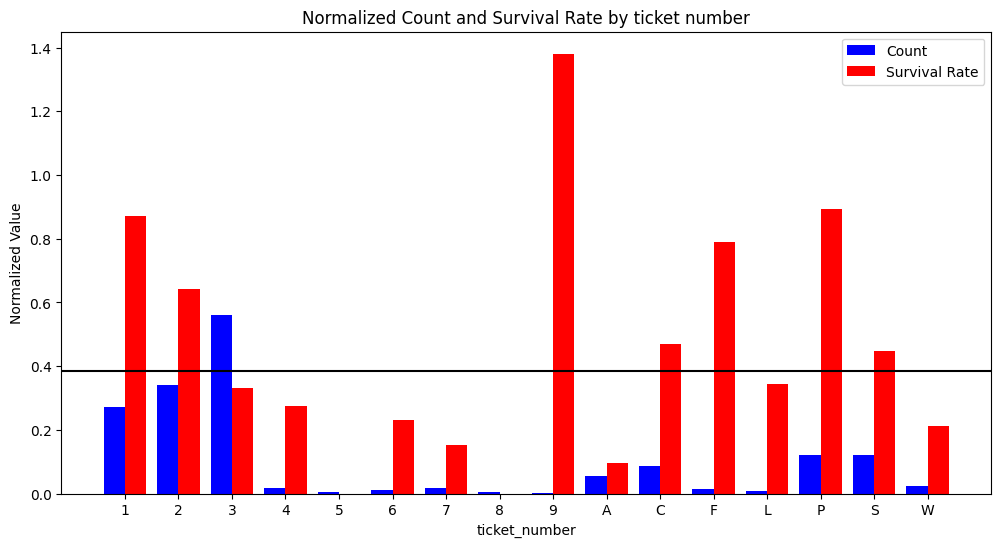

In [37]:
grouped_data_ticket = train_data.groupby(ticket_number_train).agg({
    'Survived': ['mean', 'count']
}).reset_index()

# Rename columns for clarity
grouped_data_ticket.columns = ['ticket_number', 'Survival Rate', 'Count']

# Normalize the data to the range [0, 1]
count_max_ticket = grouped_data_ticket['Count'].max()
survival_rate_max_ticket = grouped_data_ticket['Survival Rate'].max()

# Normalize both counts and survival rates
grouped_data_ticket['Normalized Count'] = grouped_data_ticket['Count'] / count_max
grouped_data_ticket['Normalized Survival Rate'] = grouped_data_ticket['Survival Rate'] / survival_rate_max

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width and positions
bar_width = 0.4
x = np.arange(len(grouped_data_ticket))

# Bar plots for Normalized Count and Normalized Survival Rate
ax.bar(x - bar_width / 2, grouped_data_ticket['Normalized Count'], width=bar_width, label='Count', color='b')
ax.bar(x + bar_width / 2, grouped_data_ticket['Normalized Survival Rate'], width=bar_width, label='Survival Rate', color='r')

# Labels and title
ax.set_xlabel('ticket_number')
ax.set_ylabel('Normalized Value')
ax.set_title('Normalized Count and Survival Rate by ticket number')
ax.set_xticks(x)
ax.set_xticklabels(grouped_data_ticket['ticket_number'])
plt.axhline(y = survived_mean,color = 'black')
ax.legend()

# Show the plot
plt.show()


Although it is referred to as a ticket number, it also contains letters.

**Name**

In [38]:
all_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

* Extracted the title of each name and put it in a seperate column.

In [39]:
name_title = all_data['Name'].str.split(",",expand = True)[1].str.split(".",expand = True)[0].replace(" ","")
name_title

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
413         Mr
414       Dona
415         Mr
416         Mr
417     Master
Name: 0, Length: 1309, dtype: object

In [40]:
name_title.value_counts()

0
 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: count, dtype: int64

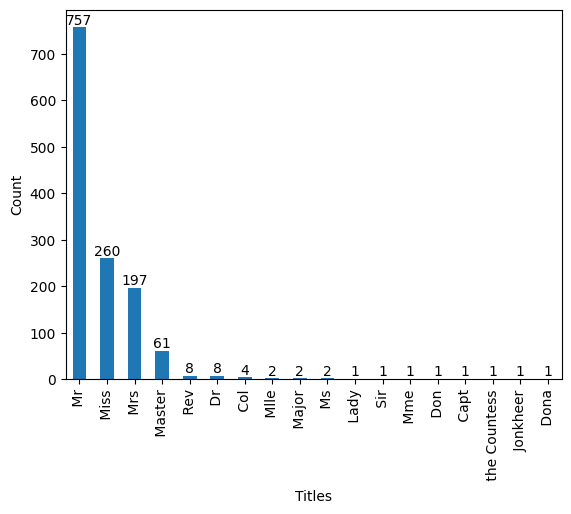

In [41]:
ax = name_title.value_counts().plot(kind = "bar")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
plt.xlabel("Titles")
plt.ylabel("Count")
plt.show()

Titles has to be replaced like this,
* military - Capt, Col, Major
* noble - Jonkheer, the Countess, Don, Lady, Sir, Dona
* unmaried Female - Mlle, Ms, Mme



In [42]:
name_title_train = train_data['Name'].str.split(",",expand = True)[1].str.split(".",expand = True)[0].replace(" ","")

       name_title  Survival Rate
0            Capt       0.000000
1             Col       0.500000
2             Don       0.000000
3              Dr       0.428571
4        Jonkheer       0.000000
5            Lady       1.000000
6           Major       0.500000
7          Master       0.575000
8            Miss       0.697802
9            Mlle       1.000000
10            Mme       1.000000
11             Mr       0.156673
12            Mrs       0.792000
13             Ms       1.000000
14            Rev       0.000000
15            Sir       1.000000
16   the Countess       1.000000


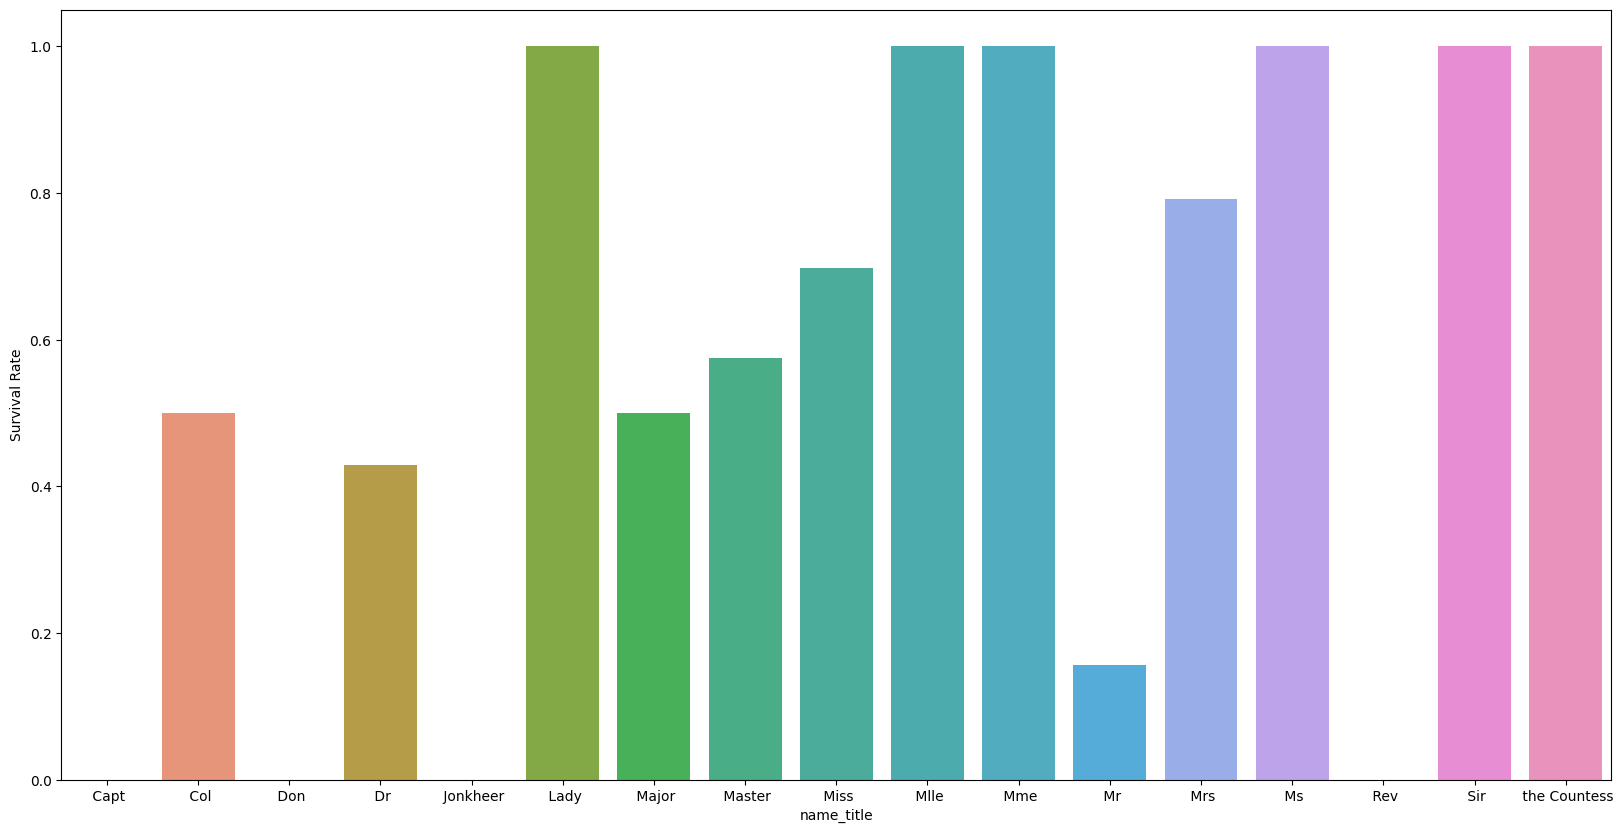

In [43]:
survival_rate_name = train_data.groupby(name_title_train)['Survived'].mean().reset_index()
survival_rate_name.columns = ['name_title', 'Survival Rate']
print(survival_rate_name)
plt.figure(figsize=(20, 10))
sns.barplot(x='name_title', y='Survival Rate', data=survival_rate_name)
plt.show()

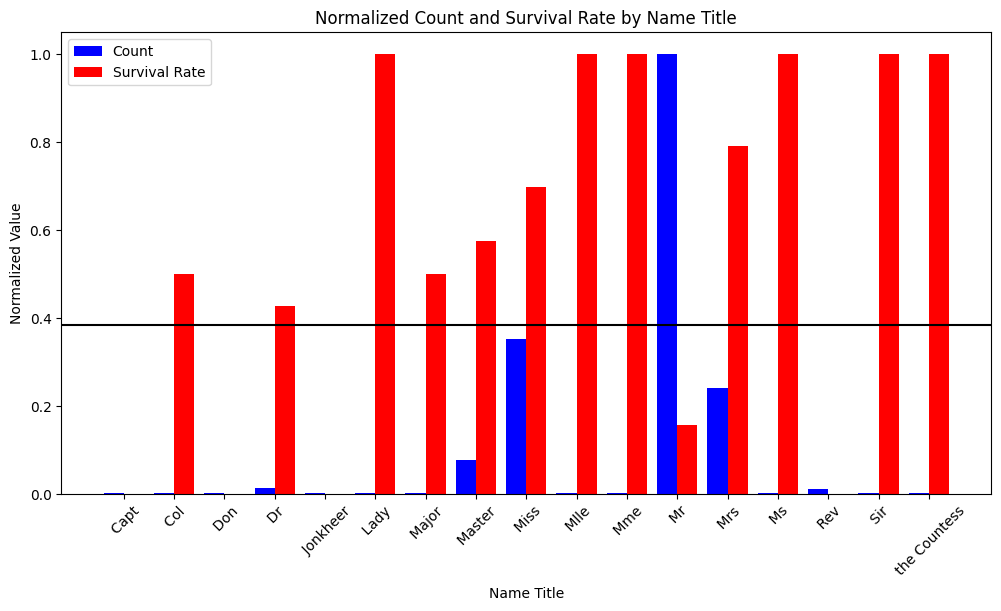

In [44]:
grouped_data_name = train_data.groupby(name_title_train).agg({
    'Survived': ['mean', 'count']
}).reset_index()

# Rename columns for clarity
grouped_data_name.columns = ['name_title', 'Survival Rate', 'Count']

# Normalize the data to the range [0, 1]
count_max = grouped_data_name['Count'].max()
survival_rate_max = grouped_data_name['Survival Rate'].max()

grouped_data_name['Normalized Count'] = grouped_data_name['Count'] / count_max
grouped_data_name['Normalized Survival Rate'] = grouped_data_name['Survival Rate'] / survival_rate_max

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width and positions
bar_width = 0.4
x = np.arange(len(grouped_data_name))  # Use the length of grouped_data_name

# Bar plots for Normalized Count and Normalized Survival Rate
ax.bar(x - bar_width / 2, grouped_data_name['Normalized Count'], width=bar_width, label='Count', color='b')
ax.bar(x + bar_width / 2, grouped_data_name['Normalized Survival Rate'], width=bar_width, label='Survival Rate', color='r')

# Labels and title
ax.set_xlabel('Name Title')
ax.set_ylabel('Normalized Value')
ax.set_title('Normalized Count and Survival Rate by Name Title')
ax.set_xticks(x)
ax.set_xticklabels(grouped_data_name['name_title'], rotation=45)  # Rotate for better visibility
plt.axhline(y = survived_mean,color = 'black')
ax.legend()

# Show the plot
plt.show()


**Cabin**

In [45]:
all_data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

In [46]:
all_data['Cabin'].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [47]:
all_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

* Filled the Nan values with U and explored the feature.
* Cleaned the data to do that.

In [48]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_flag   1309 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 143.2+ KB


In [49]:
all_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [50]:
def clean(data):
    data['Cabin'] = data['Cabin'].fillna('U')
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    # Fare has a value missing in test_data
    data['Fare'].fillna(data['Fare'].mean(), inplace=True)
    # Embarked has to missing values
    # I dropped those 2 rows as well
    data.dropna(subset = ['Embarked'],inplace = True)
    

In [51]:
clean(all_data)
clean(train_data)

After cleaning data

In [52]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Survived     1307 non-null   int64  
 2   Pclass       1307 non-null   int64  
 3   Name         1307 non-null   object 
 4   Sex          1307 non-null   object 
 5   Age          1307 non-null   float64
 6   SibSp        1307 non-null   int64  
 7   Parch        1307 non-null   int64  
 8   Ticket       1307 non-null   object 
 9   Fare         1307 non-null   float64
 10  Cabin        1307 non-null   object 
 11  Embarked     1307 non-null   object 
 12  train_flag   1307 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 143.0+ KB


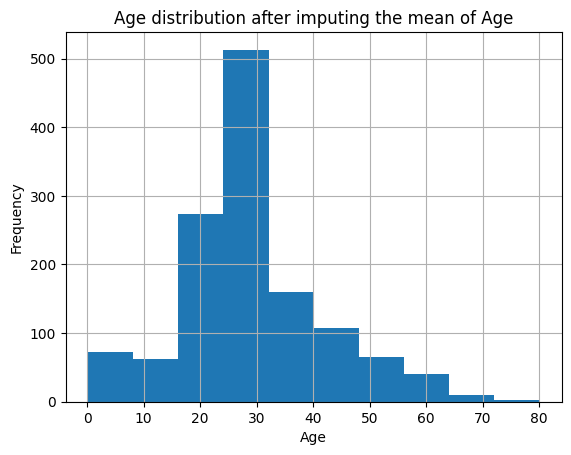

In [53]:
all_data['Age'].hist()
plt.title("Age distribution after imputing the mean of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [54]:
all_data.groupby("Survived")["Age"].mean()

Survived
-1    30.192052
 0    30.456543
 1    28.451439
Name: Age, dtype: float64

In [55]:
all_data['Age'].mean()

29.8503513439181

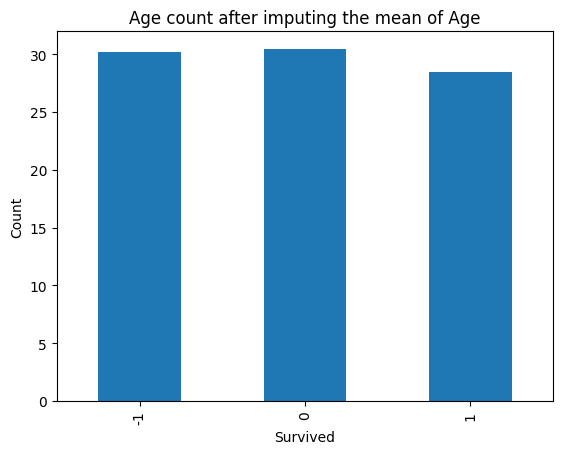

In [56]:
all_data.groupby("Survived")["Age"].mean().plot(kind = "bar")
plt.title("Age count after imputing the mean of Age")
plt.ylabel("Count")
plt.show()


Mean imputation has not seriously affected to the age

**Cabin**

In [57]:
all_data['Cabin'].unique()

array(['U', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24',

In [58]:
all_data['Cabin'].value_counts()

Cabin
U                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: count, Length: 186, dtype: int64

<Axes: xlabel='Cabin'>

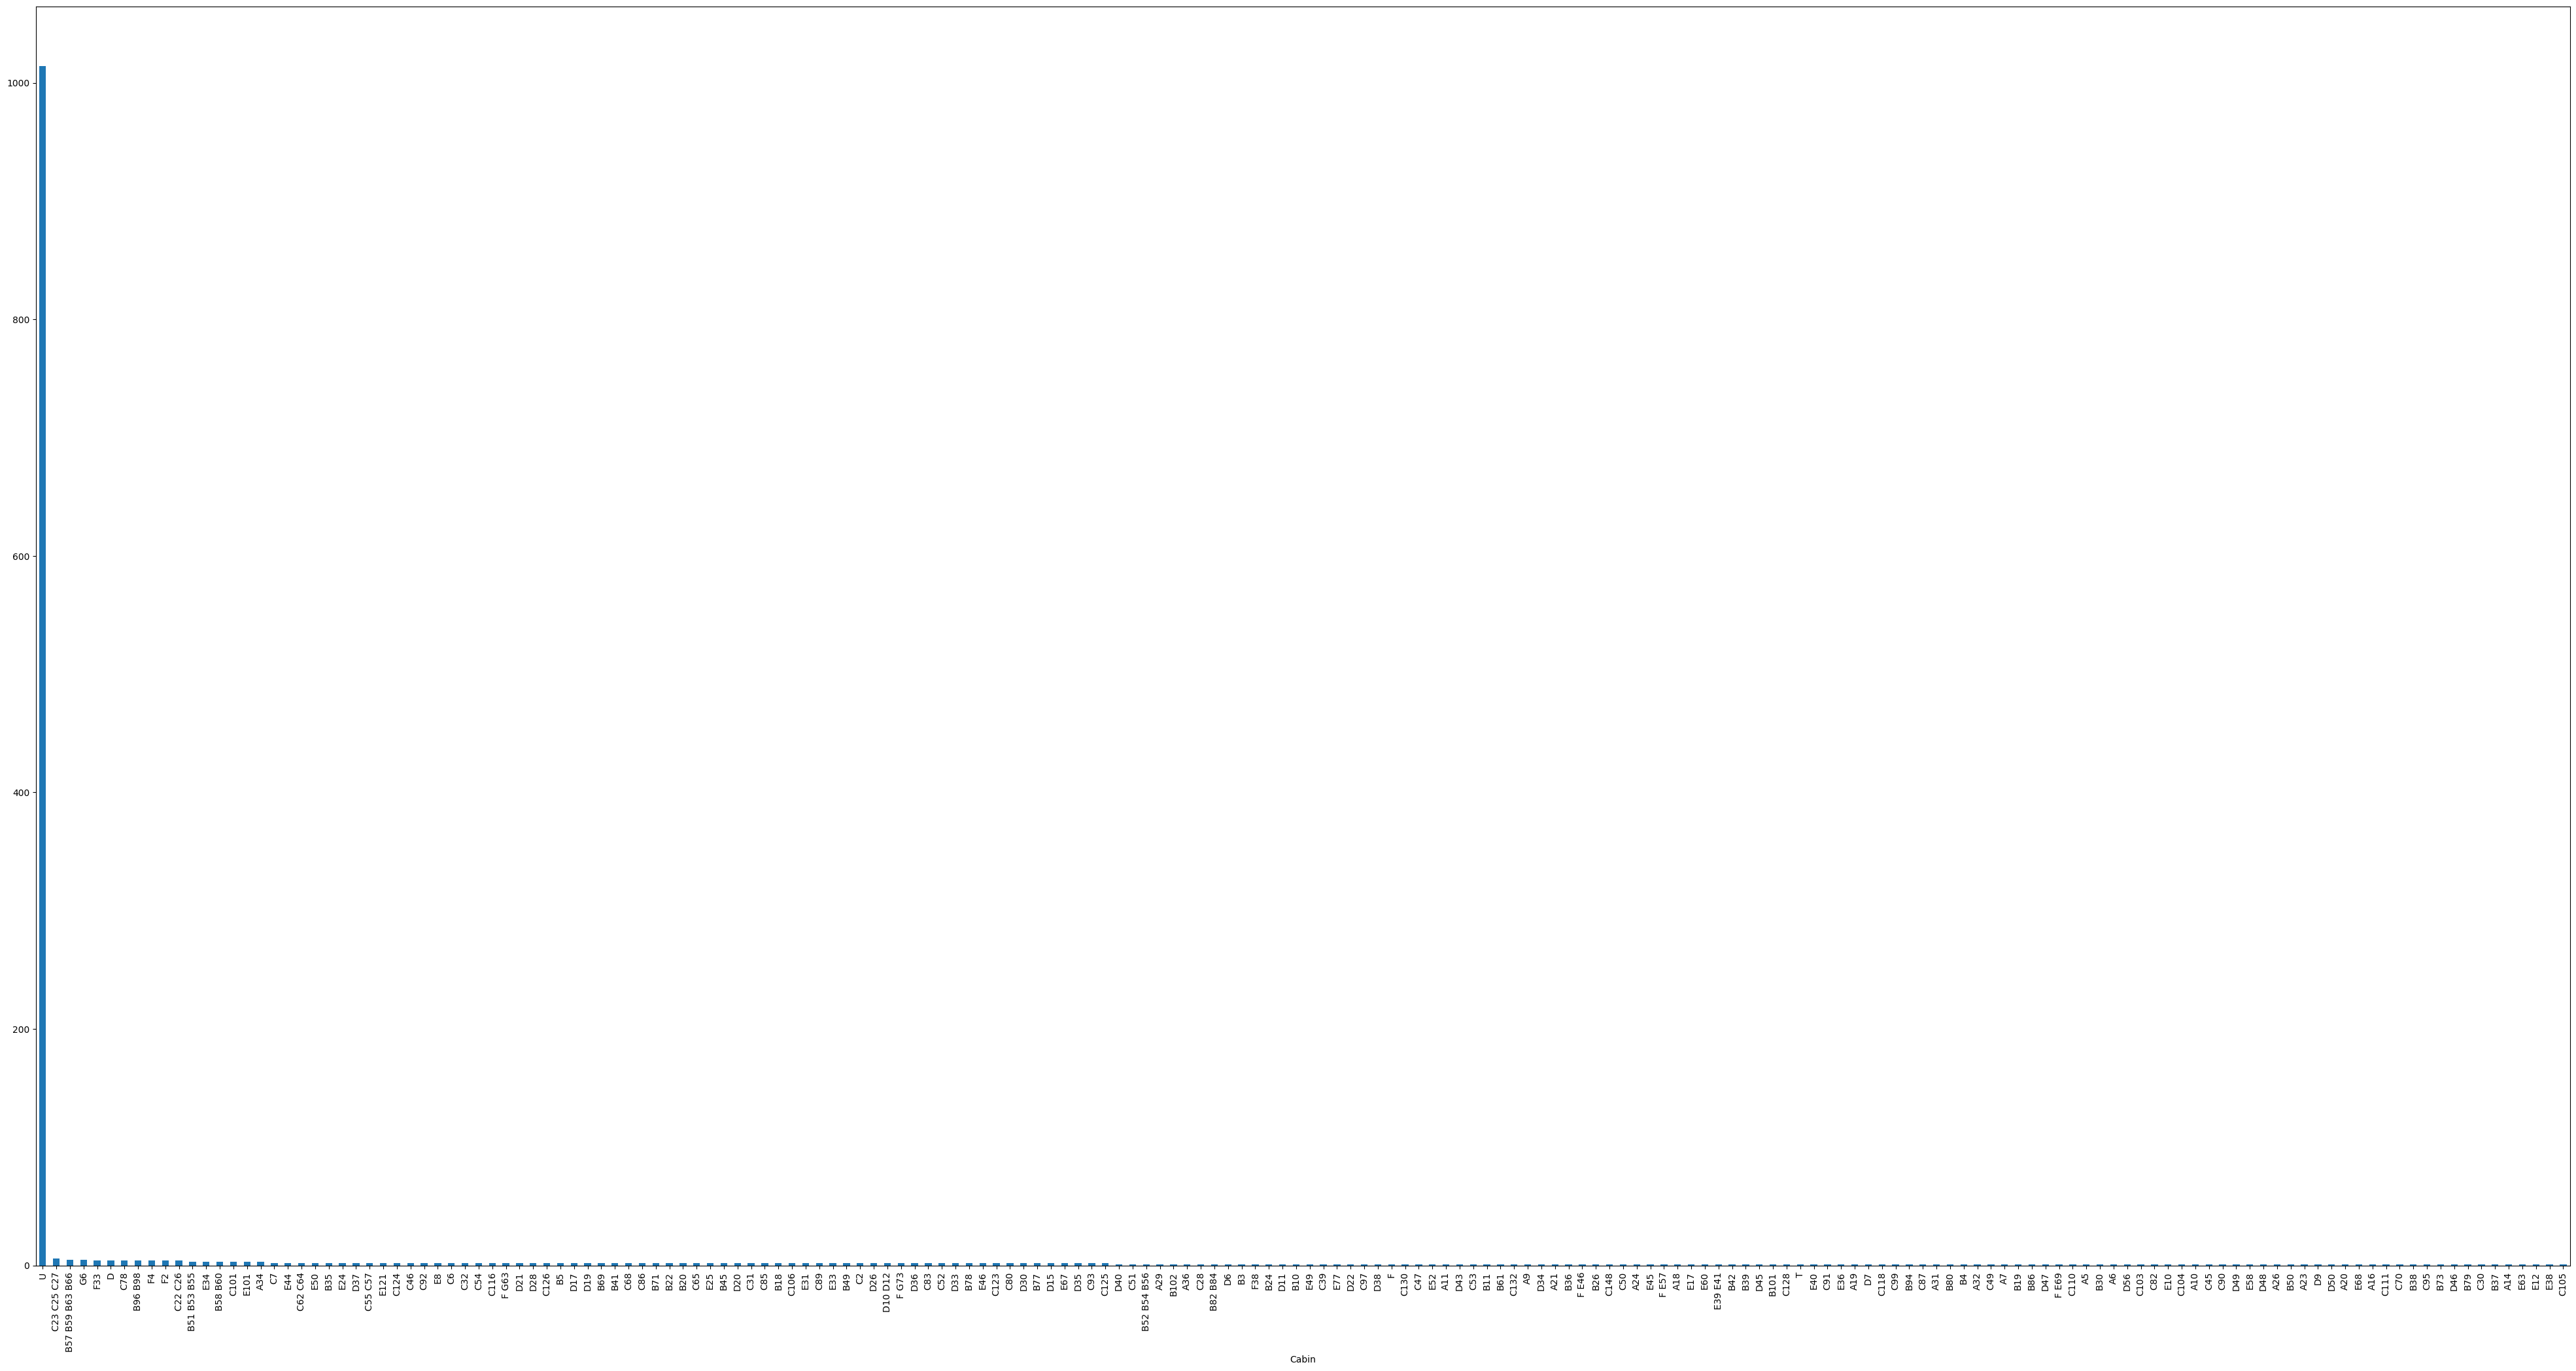

In [59]:
plt.figure(figsize = (50,25))
all_data['Cabin'].value_counts().plot(kind = "bar")

There are so many unassigned cabins

    Cabin  Survived
0     A10  0.000000
1     A14  0.000000
2     A16  1.000000
3     A19  0.000000
4     A20  1.000000
..    ...       ...
142   F38  0.000000
143    F4  1.000000
144    G6  0.500000
145     T  0.000000
146     U  0.299854

[147 rows x 2 columns]


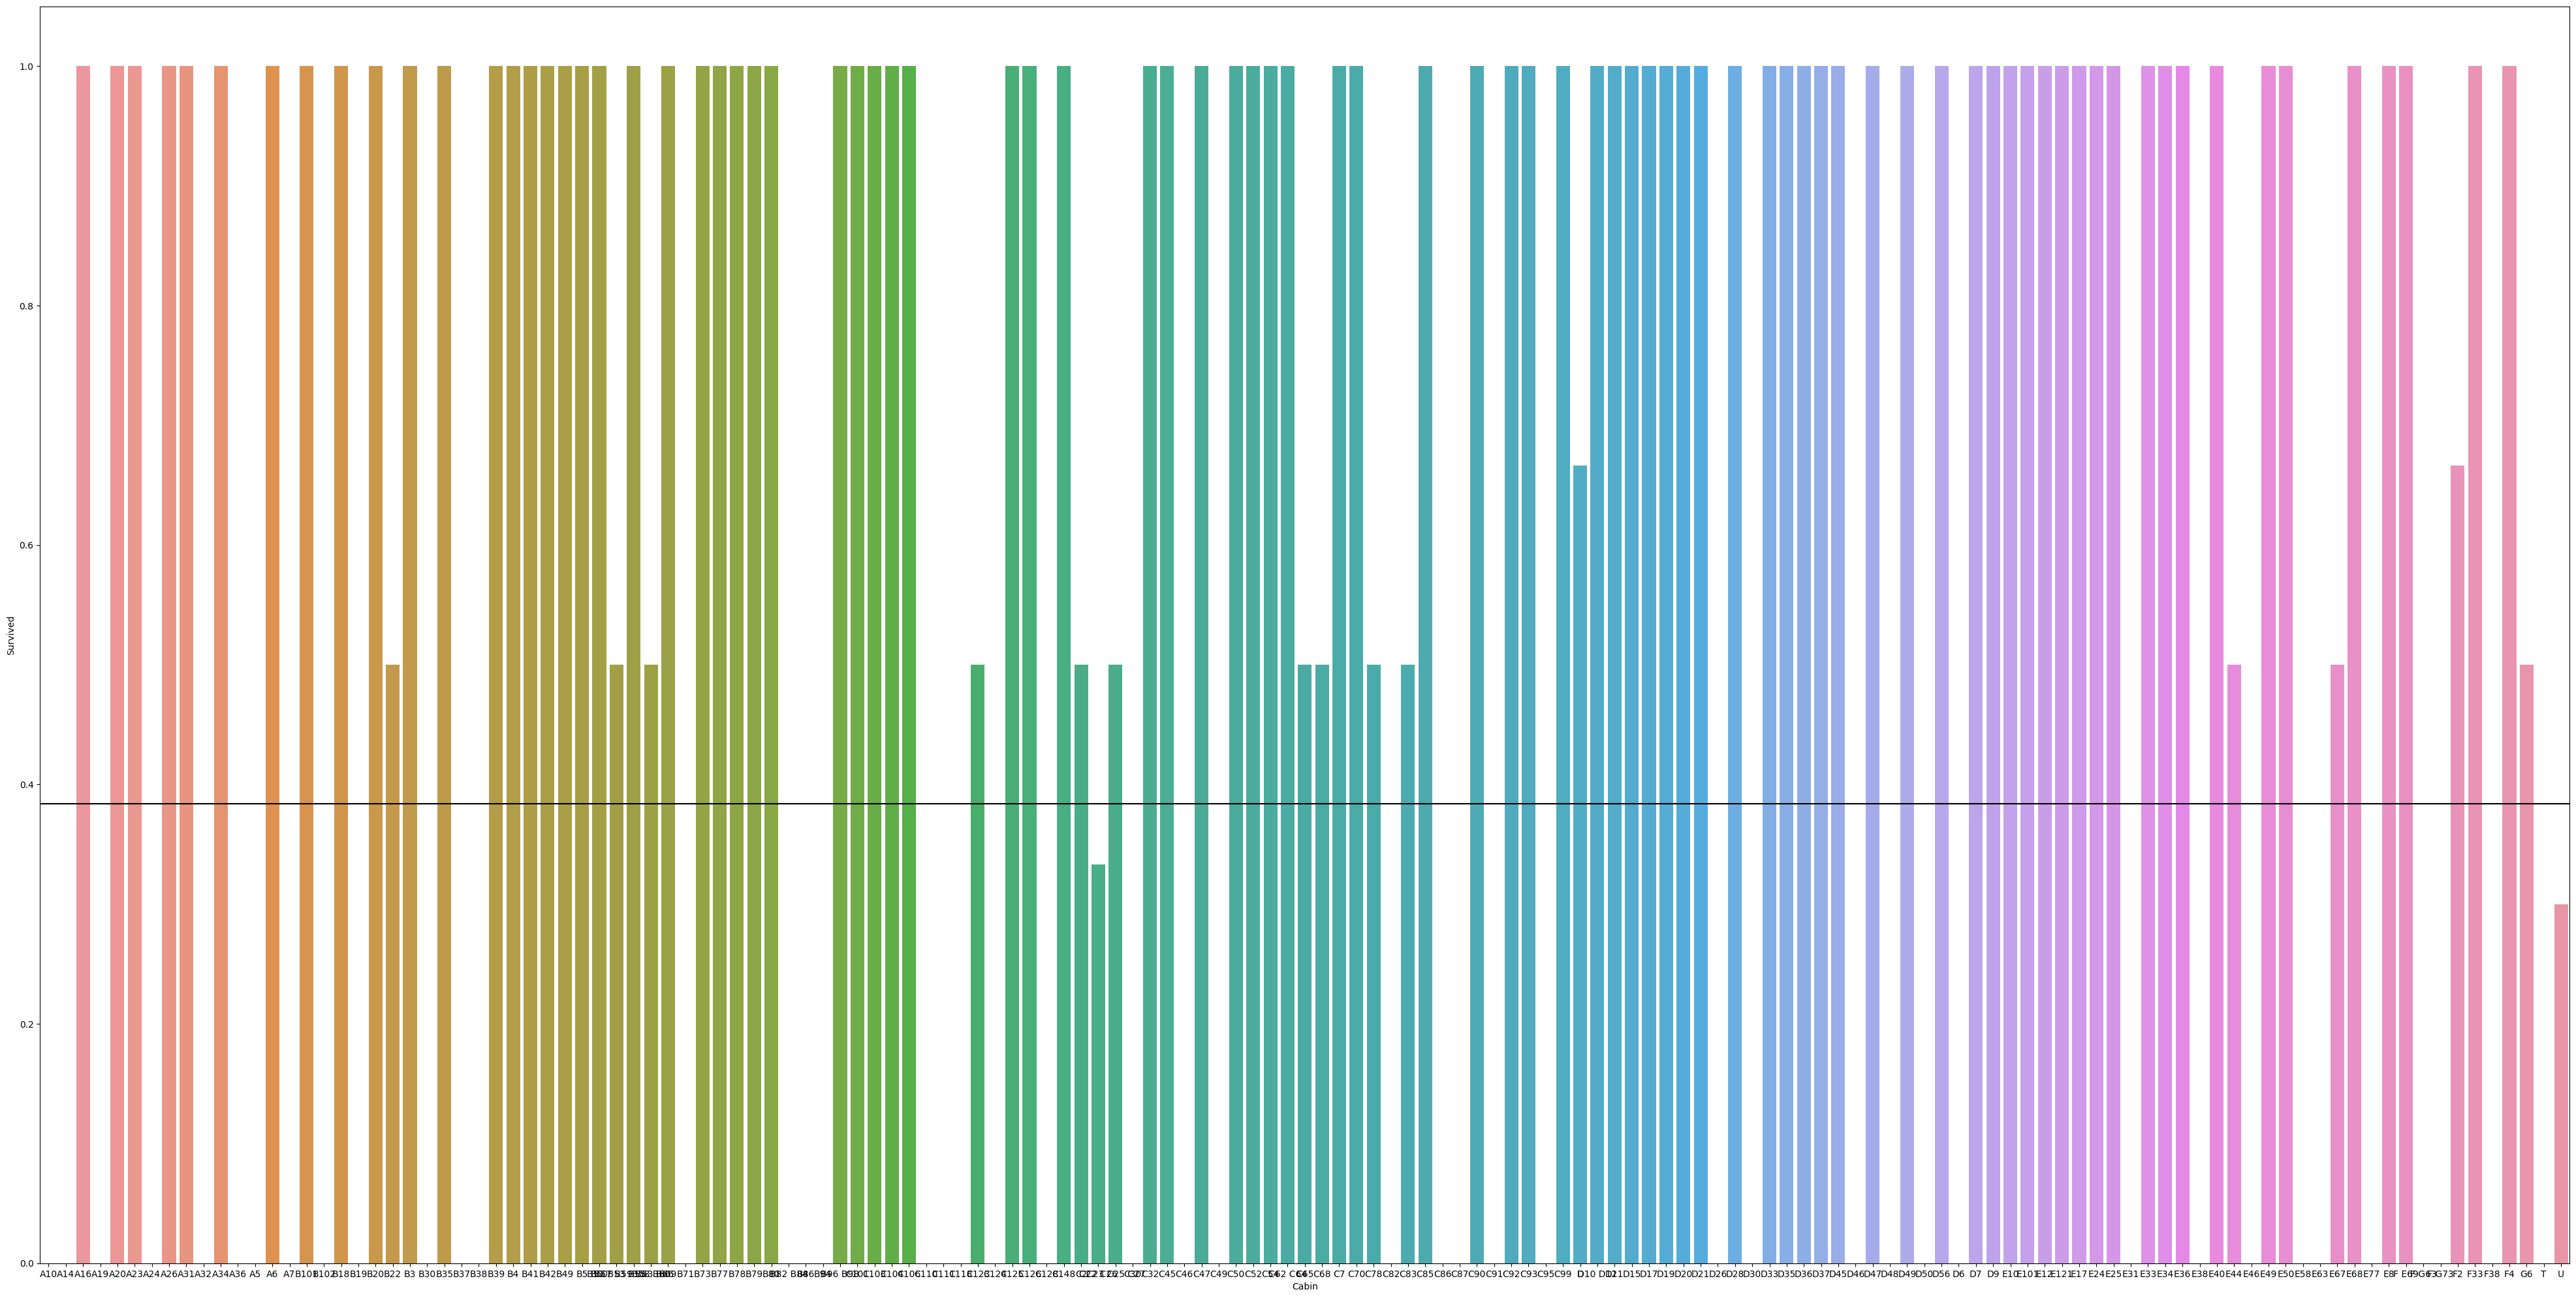

In [60]:
survival_rate_cabin = train_data.groupby('Cabin')['Survived'].mean().reset_index()
survival_rate_cabin.columns = ['Cabin', 'Survived']
print(survival_rate_cabin)
plt.figure(figsize=(50, 25))
sns.barplot(x='Cabin', y='Survived', data=survival_rate_cabin)
plt.axhline(y = survived_mean,color = 'black')
plt.show()

* Got the first letter of each cabbin and updated the cabin column.
* Need to make a feature called cabin_assigned.

In [61]:
cabin_updated = all_data['Cabin'].replace(" ","").str[0]
cabin_updated

0      U
1      C
2      U
3      C
4      U
      ..
413    U
414    C
415    U
416    U
417    U
Name: Cabin, Length: 1307, dtype: object

In [62]:
cabin_updated.value_counts()

Cabin
U    1014
C      94
B      63
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

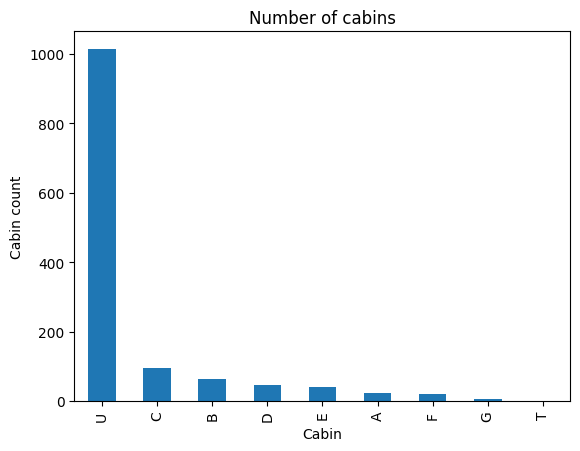

In [63]:
cabin_updated.value_counts().plot(kind = "bar")
plt.title("Number of cabins")
plt.ylabel("Cabin count")
plt.show()

In [64]:
cabin_updated_train = train_data['Cabin'].replace(" ","").str[0]

  cabin_updated  Survival Rate
0             A       0.466667
1             B       0.733333
2             C       0.593220
3             D       0.757576
4             E       0.750000
5             F       0.615385
6             G       0.500000
7             T       0.000000
8             U       0.299854


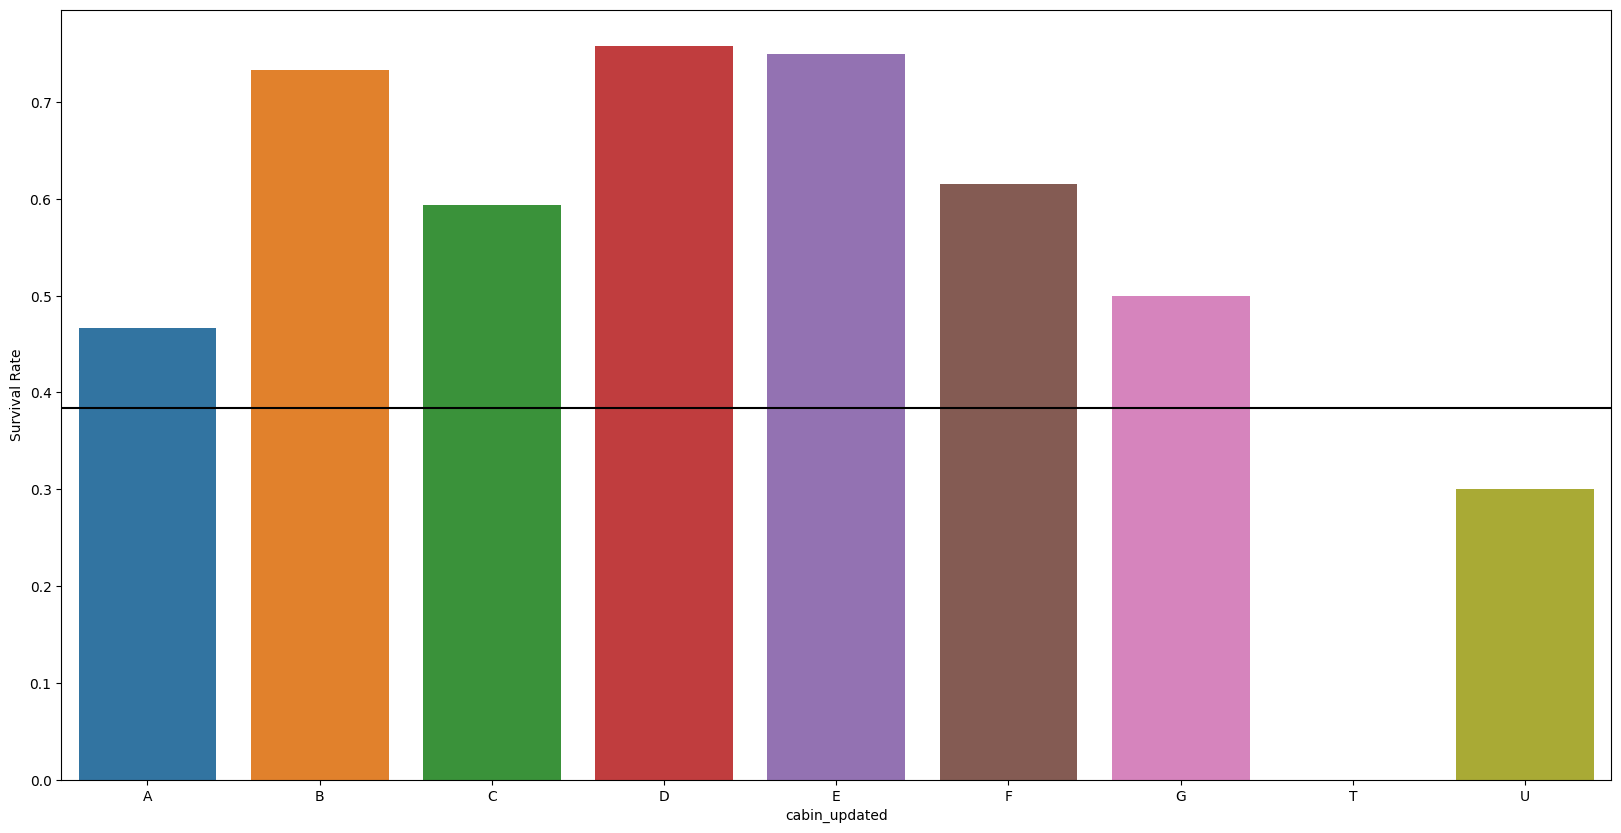

In [65]:
survival_rate_cabin = train_data.groupby(cabin_updated_train)['Survived'].mean().reset_index()
survival_rate_cabin.columns = ['cabin_updated', 'Survival Rate']
print(survival_rate_cabin)
plt.figure(figsize=(20, 10))
sns.barplot(x='cabin_updated', y='Survival Rate', data=survival_rate_cabin)
plt.axhline(y = survived_mean ,color = 'black')
plt.show()

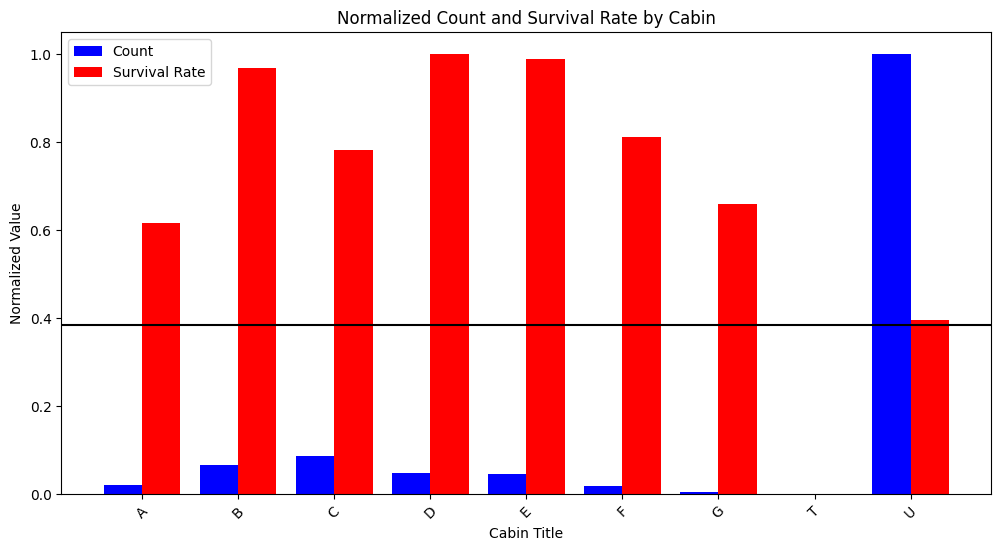

In [66]:
grouped_data_cabin = train_data.groupby(cabin_updated_train).agg({
    'Survived': ['mean', 'count']
}).reset_index()

# Rename columns for clarity
grouped_data_cabin.columns = ['cabin_updated', 'Survival Rate', 'Count']

# Normalize the data to the range [0, 1]
count_max = grouped_data_cabin['Count'].max()
survival_rate_max = grouped_data_cabin['Survival Rate'].max()

grouped_data_cabin['Normalized Count'] = grouped_data_cabin['Count'] / count_max
grouped_data_cabin['Normalized Survival Rate'] = grouped_data_cabin['Survival Rate'] / survival_rate_max

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width and positions
bar_width = 0.4
x = np.arange(len(grouped_data_cabin))  # Use the length of grouped_data_name

# Bar plots for Normalized Count and Normalized Survival Rate
ax.bar(x - bar_width / 2, grouped_data_cabin['Normalized Count'], width=bar_width, label='Count', color='b')
ax.bar(x + bar_width / 2, grouped_data_cabin['Normalized Survival Rate'], width=bar_width, label='Survival Rate', color='r')

# Labels and title
ax.set_xlabel('Cabin Title')
ax.set_ylabel('Normalized Value')
ax.set_title('Normalized Count and Survival Rate by Cabin')
ax.set_xticks(x)
ax.set_xticklabels(grouped_data_cabin['cabin_updated'], rotation=45)  # Rotate for better visibility
plt.axhline(y = survived_mean,color = 'black')
ax.legend()

# Show the plot
plt.show()


**Observations**
* A lot of people that had a cabin has been survived.
* There was one person who lived alone in a cabin and did not survive.

In [67]:
all_data[all_data["Cabin"].str[0] == "T"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_flag
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,1


* He is the only person who did not survive among those who stayed alone in a cabin.

In [68]:
def engineer_feature(data):
    # family size
    data['family_size'] = data['SibSp'] + data['Parch'] + 1
    bins = [0, 3, 6, np.inf]
    labels = ['Small', 'Medium', 'Large']
    data['family_size_grouped'] = pd.cut(data['family_size'], bins=bins, labels=labels)
    # Ticket
    data['Ticket_class'] = data['Ticket'].str.replace(" ","").str[0]
    # Name
    data['Name_title'] = data['Name'].str.split(",", expand=True)[1].str.split(".", expand=True)[0].str.strip()
    data['Name_title'] = data['Name_title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble',
    'Dona': 'Noble'
    })
    # Cabin
    data['Cabin'] = data['Cabin'].str.replace(" ","").str[0]
    data['Cabin_assigned'] = data['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
    

Have to explore name_title and cabin_assigned features

In [69]:
engineer_feature(all_data)
engineer_feature(train_data)

In [70]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          1307 non-null   int64   
 1   Survived             1307 non-null   int64   
 2   Pclass               1307 non-null   int64   
 3   Name                 1307 non-null   object  
 4   Sex                  1307 non-null   object  
 5   Age                  1307 non-null   float64 
 6   SibSp                1307 non-null   int64   
 7   Parch                1307 non-null   int64   
 8   Ticket               1307 non-null   object  
 9   Fare                 1307 non-null   float64 
 10  Cabin                1307 non-null   object  
 11  Embarked             1307 non-null   object  
 12  train_flag           1307 non-null   int64   
 13  family_size          1307 non-null   int64   
 14  family_size_grouped  1307 non-null   category
 15  Ticket_class         1307 n

In [71]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_flag,family_size,family_size_grouped,Ticket_class,Name_title,Cabin_assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,1,2,Small,A,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,2,Small,P,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1,1,Small,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1,2,Small,1,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1,1,Small,3,Mr,0


In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          889 non-null    int64   
 1   Survived             889 non-null    int64   
 2   Pclass               889 non-null    int64   
 3   Name                 889 non-null    object  
 4   Sex                  889 non-null    object  
 5   Age                  889 non-null    float64 
 6   SibSp                889 non-null    int64   
 7   Parch                889 non-null    int64   
 8   Ticket               889 non-null    object  
 9   Fare                 889 non-null    float64 
 10  Cabin                889 non-null    object  
 11  Embarked             889 non-null    object  
 12  train_flag           889 non-null    int64   
 13  family_size          889 non-null    int64   
 14  family_size_grouped  889 non-null    category
 15  Ticket_class         889 non

Lets explore the Name_title feature

In [73]:
all_data['Name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Noble', 'Rev', 'Dr', 'Military'],
      dtype=object)

In [74]:
train_data['Name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Noble', 'Rev', 'Dr', 'Military'],
      dtype=object)

In [75]:
all_data['Name_title'].value_counts()

Name_title
Mr          757
Miss        259
Mrs         196
Master       61
Noble        11
Rev           8
Dr            8
Military      7
Name: count, dtype: int64

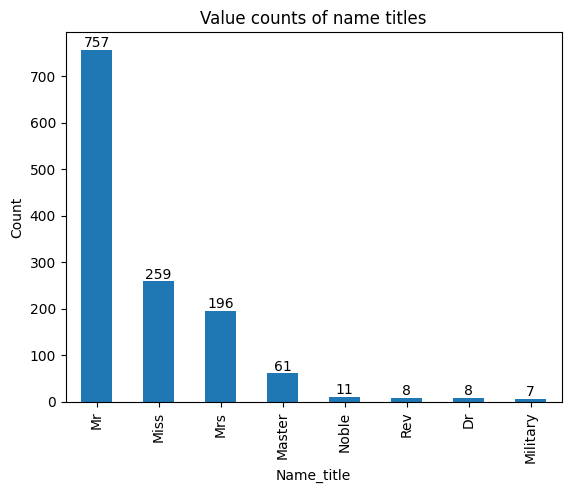

In [76]:
value_counts_title = all_data['Name_title'].value_counts()

value_counts_title.plot(kind='bar')
plt.title("Value counts of name titles")
plt.ylabel("Count")

for index, value in enumerate(value_counts_title):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()


  Name_title  Survival Rate
0         Dr       0.428571
1     Master       0.575000
2   Military       0.400000
3       Miss       0.696133
4         Mr       0.156673
5        Mrs       0.790323
6      Noble       0.777778
7        Rev       0.000000


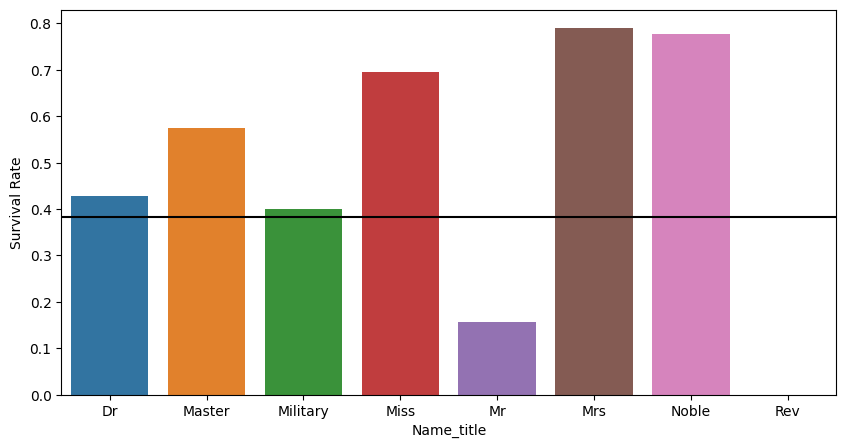

In [77]:
survival_rate_title = train_data.groupby('Name_title')['Survived'].mean().reset_index()
survival_rate_title.columns = ['Name_title', 'Survival Rate']
print(survival_rate_title)
plt.figure(figsize=(10, 5))
sns.barplot(x='Name_title', y='Survival Rate', data=survival_rate_title)
plt.axhline(y = survived_mean,color = 'black')
plt.show()

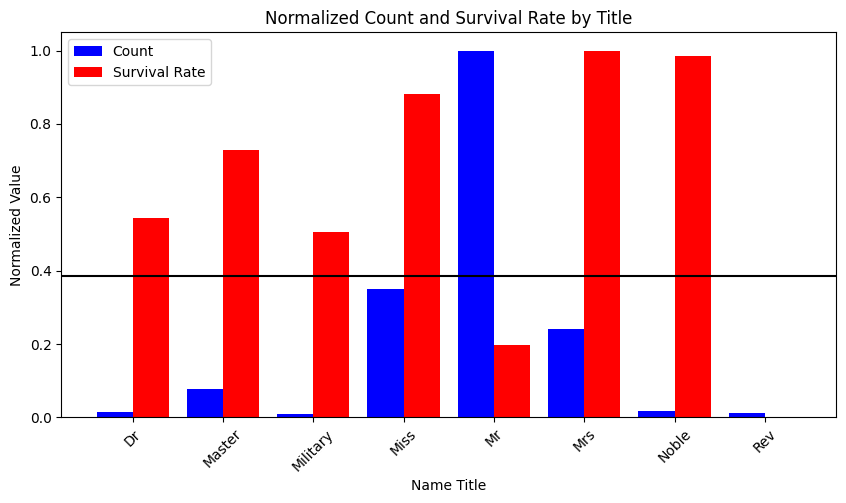

In [78]:
grouped_data_title = train_data.groupby("Name_title").agg({
    'Survived': ['mean', 'count']
}).reset_index()

grouped_data_title.columns = ['Name_title', 'Survival Rate', 'Count']

count_max = grouped_data_title['Count'].max()
survival_rate_max = grouped_data_title['Survival Rate'].max()

grouped_data_title['Normalized Count'] = grouped_data_title['Count'] / count_max
grouped_data_title['Normalized Survival Rate'] = grouped_data_title['Survival Rate'] / survival_rate_max

fig, ax = plt.subplots(figsize=(10, 5))

bar_width = 0.4
x = np.arange(len(grouped_data_title))  

ax.bar(x - bar_width / 2, grouped_data_title['Normalized Count'], width=bar_width, label='Count', color='b')
ax.bar(x + bar_width / 2, grouped_data_title['Normalized Survival Rate'], width=bar_width, label='Survival Rate', color='r')

ax.set_xlabel('Name Title')
ax.set_ylabel('Normalized Value')
ax.set_title('Normalized Count and Survival Rate by Title')
ax.set_xticks(x)
ax.set_xticklabels(grouped_data_title['Name_title'], rotation=45)  # Rotate for better visibility
plt.axhline(y = survived_mean,color = 'black')
ax.legend()

plt.show()

**Observations**
* There has been 6 reverents in the ship. But no one has been survived.
* There are men more than women in the ship.
* Most of the women are unmarried.
* Women have been survived more than men.

Lets explore the family_size_grouped feature

* Small (family size 1-3)
* Medium (family size 4-6)
* Large (family size 7+)


<ipython-input-79-16fd7018ad0d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_family = train_data.groupby("family_size_grouped").agg({


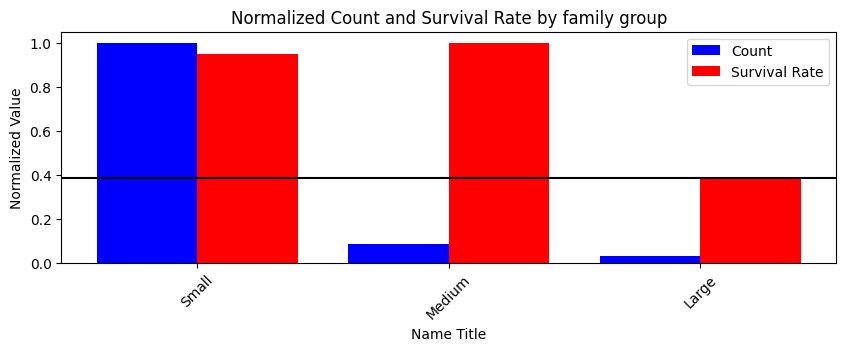

In [79]:
grouped_data_family = train_data.groupby("family_size_grouped").agg({
    'Survived': ['mean', 'count']
}).reset_index()

# Rename columns for clarity
grouped_data_family.columns = ['family_size_grouped', 'Survival Rate', 'Count']

# Normalize the data to the range [0, 1]
count_max = grouped_data_family['Count'].max()
survival_rate_max = grouped_data_family['Survival Rate'].max()

grouped_data_family['Normalized Count'] = grouped_data_family['Count'] / count_max
grouped_data_family['Normalized Survival Rate'] = grouped_data_family['Survival Rate'] / survival_rate_max

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 3))

# Bar width and positions
bar_width = 0.4
x = np.arange(len(grouped_data_family))  # Use the length of grouped_data_name

# Bar plots for Normalized Count and Normalized Survival Rate
ax.bar(x - bar_width / 2, grouped_data_family['Normalized Count'], width=bar_width, label='Count', color='b')
ax.bar(x + bar_width / 2, grouped_data_family['Normalized Survival Rate'], width=bar_width, label='Survival Rate', color='r')

# Labels and title
ax.set_xlabel('Name Title')
ax.set_ylabel('Normalized Value')
ax.set_title('Normalized Count and Survival Rate by family group')
ax.set_xticks(x)
ax.set_xticklabels(grouped_data_family['family_size_grouped'], rotation=45)  # Rotate for better visibility
plt.axhline(y = survived_mean,color = 'black')
ax.legend()

# Show the plot
plt.show()


Lets explore cabin_assigned feature

* 0 - not assigned
* 1 - assigned


In [80]:
all_data['Cabin_assigned'].value_counts()

Cabin_assigned
0    1014
1     293
Name: count, dtype: int64

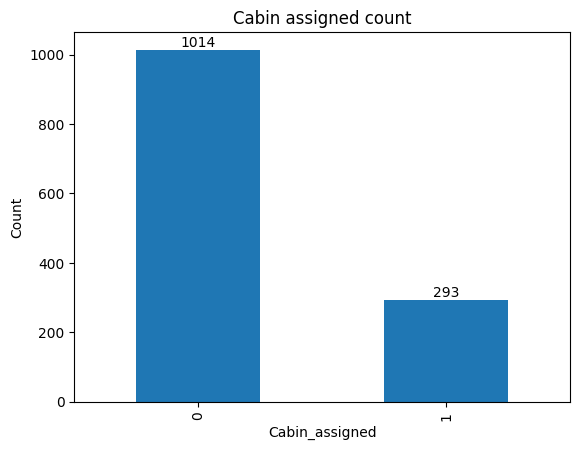

In [81]:
value_counts_cabin = all_data['Cabin_assigned'].value_counts()
value_counts_cabin.plot(kind = "bar")
plt.title("Cabin assigned count")
plt.ylabel("Count")
for index, value in enumerate(value_counts_cabin):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

   Cabin_assigned  Survival Rate
0               0       0.299854
1               1       0.663366


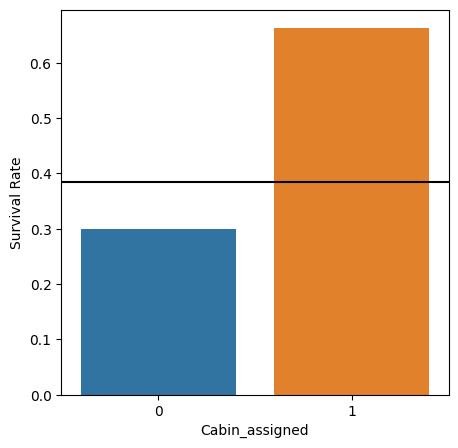

In [82]:
survival_rate_cabin = train_data.groupby('Cabin_assigned')['Survived'].mean().reset_index()
survival_rate_cabin.columns = ['Cabin_assigned', 'Survival Rate']
print(survival_rate_cabin)
plt.figure(figsize=(5, 5))
sns.barplot(x='Cabin_assigned', y='Survival Rate', data=survival_rate_cabin)
plt.axhline(y = survived_mean,color = 'black')
plt.show()

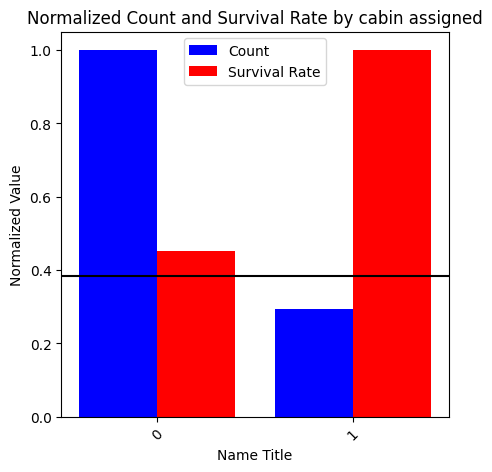

In [83]:
grouped_data_cabin = train_data.groupby("Cabin_assigned").agg({
    'Survived': ['mean', 'count']
}).reset_index()

# Rename columns for clarity
grouped_data_cabin.columns = ['Cabin_assigned', 'Survival Rate', 'Count']

# Normalize the data to the range [0, 1]
count_max = grouped_data_cabin['Count'].max()
survival_rate_max = grouped_data_cabin['Survival Rate'].max()

grouped_data_cabin['Normalized Count'] = grouped_data_cabin['Count'] / count_max
grouped_data_cabin['Normalized Survival Rate'] = grouped_data_cabin['Survival Rate'] / survival_rate_max

# Set up the figure
fig, ax = plt.subplots(figsize=(5, 5))

# Bar width and positions
bar_width = 0.4
x = np.arange(len(grouped_data_cabin))  # Use the length of grouped_data_name

# Bar plots for Normalized Count and Normalized Survival Rate
ax.bar(x - bar_width / 2, grouped_data_cabin['Normalized Count'], width=bar_width, label='Count', color='b')
ax.bar(x + bar_width / 2, grouped_data_cabin['Normalized Survival Rate'], width=bar_width, label='Survival Rate', color='r')

# Labels and title
ax.set_xlabel('Name Title')
ax.set_ylabel('Normalized Value')
ax.set_title('Normalized Count and Survival Rate by cabin assigned')
ax.set_xticks(x)
ax.set_xticklabels(grouped_data_cabin['Cabin_assigned'], rotation=45)  # Rotate for better visibility
plt.axhline(y = survived_mean,color = 'black')
ax.legend()

# Show the plot
plt.show()


**Observations**
* Most of the people in the ship didn't have cabins.
* People that had cabins have survived a lot.

In [84]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          1307 non-null   int64   
 1   Survived             1307 non-null   int64   
 2   Pclass               1307 non-null   int64   
 3   Name                 1307 non-null   object  
 4   Sex                  1307 non-null   object  
 5   Age                  1307 non-null   float64 
 6   SibSp                1307 non-null   int64   
 7   Parch                1307 non-null   int64   
 8   Ticket               1307 non-null   object  
 9   Fare                 1307 non-null   float64 
 10  Cabin                1307 non-null   object  
 11  Embarked             1307 non-null   object  
 12  train_flag           1307 non-null   int64   
 13  family_size          1307 non-null   int64   
 14  family_size_grouped  1307 non-null   category
 15  Ticket_class         1307 n

Need to drop unnecessary columns

In [85]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
 12  train_flag   418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


In [86]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_flag,family_size,family_size_grouped,Ticket_class,Name_title,Cabin_assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,1,2,Small,A,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,2,Small,P,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,1,1,Small,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1,2,Small,1,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,1,1,Small,3,Mr,0


Time to find out correlations between features

In [87]:
data_cat_new = all_data[['Survived','Pclass','Sex','Cabin','Embarked','Ticket_class','Name_title','Cabin_assigned','Name']]

<Axes: >

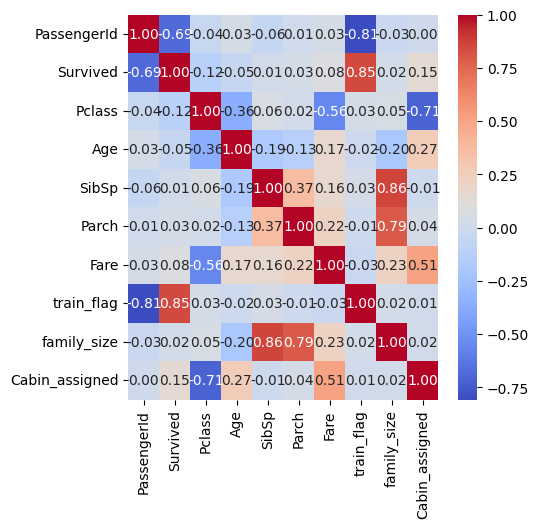

In [88]:
correlation_matrix = all_data.corr(numeric_only=True)

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

No stronger correlations between numerical features

Used Cramer's V technique to find correlations between categorical features

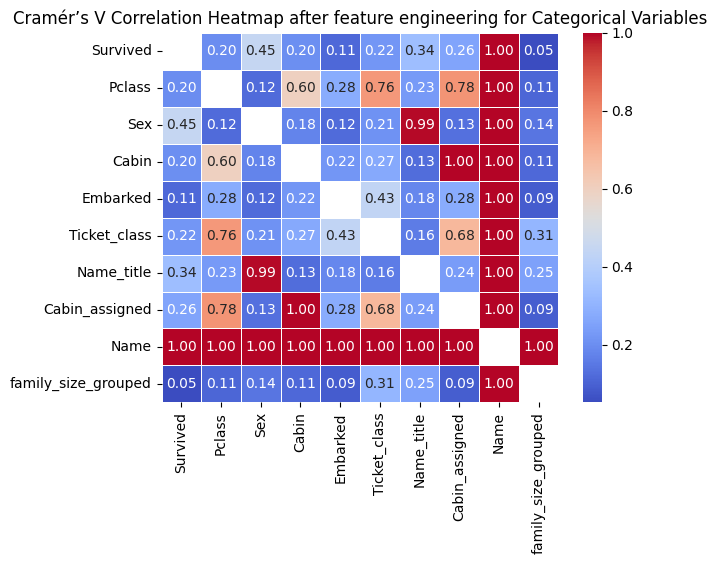

In [89]:
# Function to calculate Cramér's V
def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape)
    return np.sqrt(chi2 / (n * (k - 1)))
cat_variables_new = ['Survived','Pclass','Sex','Cabin','Embarked','Ticket_class','Name_title','Cabin_assigned','Name','family_size_grouped']
# Created an empty matrix for storing Cramér's V values
correlation_matrix = pd.DataFrame(index=cat_variables_new, columns=cat_variables_new)

# Calculated Cramér’s V for all categorical variable pairs
for var1 in cat_variables_new:
    for var2 in cat_variables_new:
        if var1 != var2:
            contingency_table = pd.crosstab(all_data[var1], all_data[var2])
            correlation_matrix.loc[var1, var2] = cramers_v(contingency_table)

# Converted the correlation matrix to float
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Cramér’s V Correlation Heatmap after feature engineering for Categorical Variables')
plt.show()


* There are stronger correlations between cabin and cabin_assigned columns.
* Good to remove the cabin_assigned column.
* The name column has to be removed.

In [90]:
def drop_col(data):
    data.drop(columns = ['PassengerId','SibSp','Parch','Ticket','Cabin_assigned','Name','family_size'],inplace = True)


In [91]:
drop_col(all_data)
drop_col(train_data)

In [92]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Survived             1307 non-null   int64   
 1   Pclass               1307 non-null   int64   
 2   Sex                  1307 non-null   object  
 3   Age                  1307 non-null   float64 
 4   Fare                 1307 non-null   float64 
 5   Cabin                1307 non-null   object  
 6   Embarked             1307 non-null   object  
 7   train_flag           1307 non-null   int64   
 8   family_size_grouped  1307 non-null   category
 9   Ticket_class         1307 non-null   object  
 10  Name_title           1307 non-null   object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 113.7+ KB


In [93]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Survived             889 non-null    int64   
 1   Pclass               889 non-null    int64   
 2   Sex                  889 non-null    object  
 3   Age                  889 non-null    float64 
 4   Fare                 889 non-null    float64 
 5   Cabin                889 non-null    object  
 6   Embarked             889 non-null    object  
 7   train_flag           889 non-null    int64   
 8   family_size_grouped  889 non-null    category
 9   Ticket_class         889 non-null    object  
 10  Name_title           889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.4+ KB


Lets now check correlations

<Axes: >

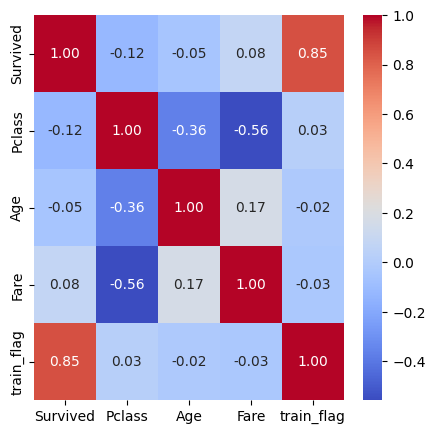

In [94]:
correlation_matrix = all_data.corr(numeric_only=True)

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [95]:
# Identified categorical columns
categorical_features = all_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Printed the list of categorical features
print(categorical_features)


['Sex', 'Cabin', 'Embarked', 'family_size_grouped', 'Ticket_class', 'Name_title']


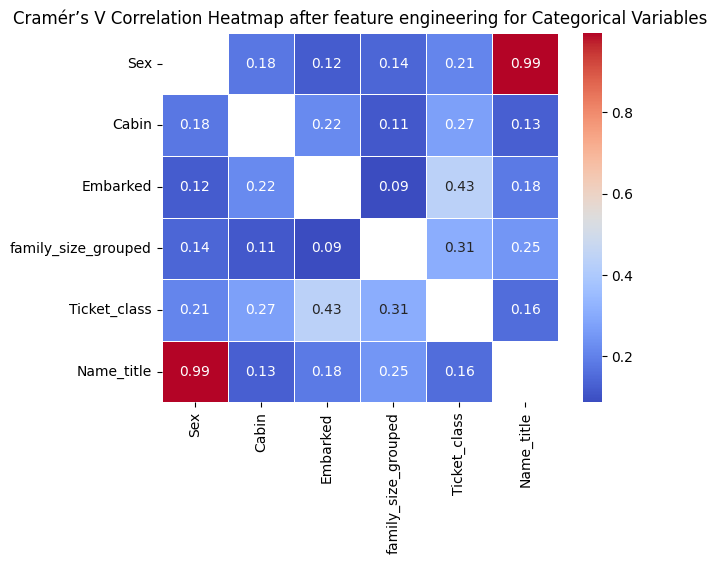

In [96]:
# Function to calculate Cramér's V
def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape)
    return np.sqrt(chi2 / (n * (k - 1)))
cat_variables_new = all_data.select_dtypes(include=['object', 'category']).columns.tolist()
# Create an empty matrix for storing Cramér's V values
correlation_matrix = pd.DataFrame(index=cat_variables_new, columns=cat_variables_new)

# Calculate Cramér’s V for all categorical variable pairs
for var1 in cat_variables_new:
    for var2 in cat_variables_new:
        if var1 != var2:
            contingency_table = pd.crosstab(all_data[var1], all_data[var2])
            correlation_matrix.loc[var1, var2] = cramers_v(contingency_table)

# Convert the correlation matrix to float
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Cramér’s V Correlation Heatmap after feature engineering for Categorical Variables')
plt.show()


Now it looks better than the previous one.

In [97]:
all_data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,train_flag,family_size_grouped,Ticket_class,Name_title
0,0,3,male,22.0,7.2500,U,S,1,Small,A,Mr
1,1,1,female,38.0,71.2833,C,C,1,Small,P,Mrs
2,1,3,female,26.0,7.9250,U,S,1,Small,S,Miss
3,1,1,female,35.0,53.1000,C,S,1,Small,1,Mrs
4,0,3,male,35.0,8.0500,U,S,1,Small,3,Mr


In [98]:
all_data['Name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Noble', 'Rev', 'Dr', 'Military'],
      dtype=object)

In [99]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Survived             1307 non-null   int64   
 1   Pclass               1307 non-null   int64   
 2   Sex                  1307 non-null   object  
 3   Age                  1307 non-null   float64 
 4   Fare                 1307 non-null   float64 
 5   Cabin                1307 non-null   object  
 6   Embarked             1307 non-null   object  
 7   train_flag           1307 non-null   int64   
 8   family_size_grouped  1307 non-null   category
 9   Ticket_class         1307 non-null   object  
 10  Name_title           1307 non-null   object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 113.7+ KB


In [100]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
 12  train_flag   418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


# **Data preprocessing**

1. Transformed(Normalized) numerical data.
2. Used One-hot encoding for categorical data.
3. Scaled data.

Normalized data

In [101]:
# Get the list of numerical columns
numerical_columns = all_data.select_dtypes(include=['number']).columns.tolist()

# Get the list of categorical columns
categorical_columns = all_data.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)


Numerical Columns: ['Survived', 'Pclass', 'Age', 'Fare', 'train_flag']
Categorical Columns: ['Sex', 'Cabin', 'Embarked', 'family_size_grouped', 'Ticket_class', 'Name_title']


Pclass can be treated as a categorical column

In [102]:
numerical_columns.remove("Pclass")
categorical_columns.append("Pclass")

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['Survived', 'Age', 'Fare', 'train_flag']
Categorical Columns: ['Sex', 'Cabin', 'Embarked', 'family_size_grouped', 'Ticket_class', 'Name_title', 'Pclass']


Age normalization

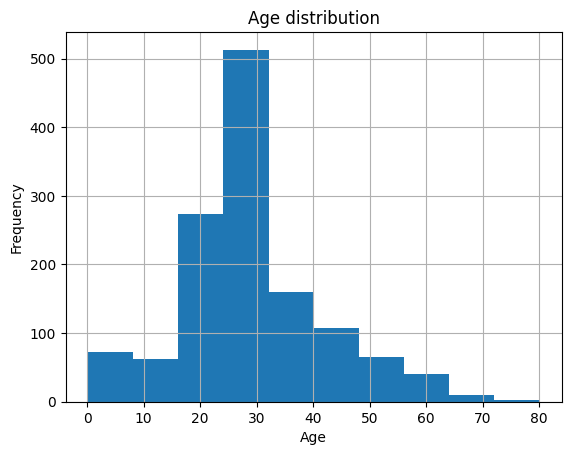

In [103]:
all_data['Age'].hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
plt.show()

Age is closed to a normal distribution

Fare normalization

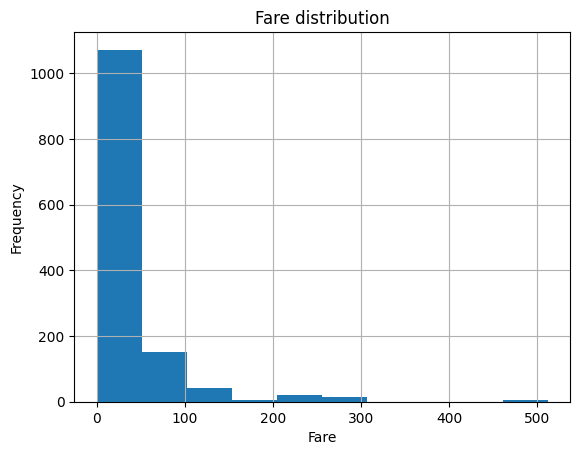

In [104]:
all_data.Fare.hist()
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Fare distribution")
plt.show()

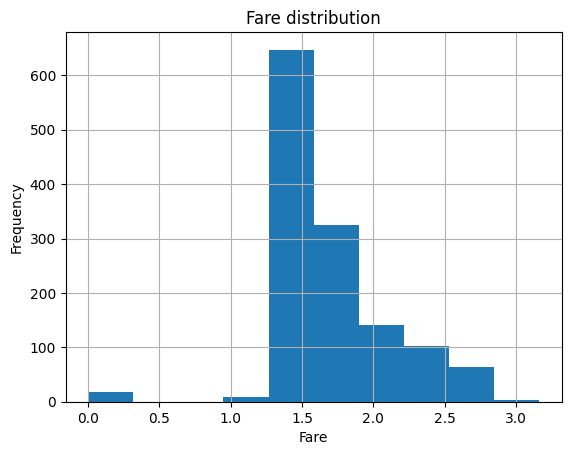

In [105]:
(np.log(np.sqrt(all_data.Fare)+1)).hist()
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Fare distribution")
plt.show()

This seems closer to the normal distribution

In [106]:
def preprocess(data):
    #Normalize data
    data['norm_fare']= np.log(np.sqrt(data.Fare)+1)
    data.drop(columns = ['Fare'], inplace = True)

    # Renamed the cabin column
    data.rename(columns={'Cabin': 'Cabin_modified'}, inplace=True)

    # Used one hot encoding for categorical data
    # converted Pclass to category for pd.get_dummies()
    data.Pclass = data.Pclass.astype(str)

    # One-Hot Encoding with prefixes for each column
    data_encoded = pd.get_dummies(data[['Pclass', 'Sex', 'Embarked', 'Cabin_modified', 'Name_title','family_size_grouped','Ticket_class']], 
                              prefix=['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title','Family','Ticket'])

    # Concatenate the original DataFrame with the encoded columns
    data = pd.concat([data, data_encoded], axis=1)

    # Droped the original columns if they are no longer needed
    data = data.drop(['Pclass', 'Sex', 'Embarked', 'Cabin_modified', 'Name_title','family_size_grouped','Ticket_class'], axis=1)

    # Scaling
    # Used the standard scaler.
    import sklearn
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data[['Age', 'norm_fare']] = scaler.fit_transform(data[['Age', 'norm_fare']])

    data = data.apply(lambda x: x.astype(int) if x.dtype == bool else x)
    
    return data

In [107]:
all_data = preprocess(all_data)
train_data = preprocess(train_data)

In [108]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        1307 non-null   int64  
 1   Age             1307 non-null   float64
 2   train_flag      1307 non-null   int64  
 3   norm_fare       1307 non-null   float64
 4   Pclass_1        1307 non-null   int64  
 5   Pclass_2        1307 non-null   int64  
 6   Pclass_3        1307 non-null   int64  
 7   Sex_female      1307 non-null   int64  
 8   Sex_male        1307 non-null   int64  
 9   Embarked_C      1307 non-null   int64  
 10  Embarked_Q      1307 non-null   int64  
 11  Embarked_S      1307 non-null   int64  
 12  Cabin_A         1307 non-null   int64  
 13  Cabin_B         1307 non-null   int64  
 14  Cabin_C         1307 non-null   int64  
 15  Cabin_D         1307 non-null   int64  
 16  Cabin_E         1307 non-null   int64  
 17  Cabin_F         1307 non-null   int64  

In [109]:
all_data.head()

,Survived,Age,train_flag,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,Ticket_7,Ticket_8,Ticket_9,Ticket_A,Ticket_C,Ticket_F,Ticket_L,Ticket_P,Ticket_S,Ticket_W
0,0,-0.610663,1,-0.834473,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0.633944,1,1.299227,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,-0.299511,1,-0.760276,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0.400581,1,1.002484,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.400581,1,-0.747142,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        889 non-null    int64  
 1   Age             889 non-null    float64
 2   train_flag      889 non-null    int64  
 3   norm_fare       889 non-null    float64
 4   Pclass_1        889 non-null    int64  
 5   Pclass_2        889 non-null    int64  
 6   Pclass_3        889 non-null    int64  
 7   Sex_female      889 non-null    int64  
 8   Sex_male        889 non-null    int64  
 9   Embarked_C      889 non-null    int64  
 10  Embarked_Q      889 non-null    int64  
 11  Embarked_S      889 non-null    int64  
 12  Cabin_A         889 non-null    int64  
 13  Cabin_B         889 non-null    int64  
 14  Cabin_C         889 non-null    int64  
 15  Cabin_D         889 non-null    int64  
 16  Cabin_E         889 non-null    int64  
 17  Cabin_F         889 non-null    int64  


In [111]:
# Seperated the all_data
data_train = all_data[all_data["train_flag"] == 1].drop("train_flag", axis=1)
data_test = all_data[all_data['train_flag'] == 0].drop(['train_flag',"Survived"], axis=1)

In [112]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        889 non-null    int64  
 1   Age             889 non-null    float64
 2   norm_fare       889 non-null    float64
 3   Pclass_1        889 non-null    int64  
 4   Pclass_2        889 non-null    int64  
 5   Pclass_3        889 non-null    int64  
 6   Sex_female      889 non-null    int64  
 7   Sex_male        889 non-null    int64  
 8   Embarked_C      889 non-null    int64  
 9   Embarked_Q      889 non-null    int64  
 10  Embarked_S      889 non-null    int64  
 11  Cabin_A         889 non-null    int64  
 12  Cabin_B         889 non-null    int64  
 13  Cabin_C         889 non-null    int64  
 14  Cabin_D         889 non-null    int64  
 15  Cabin_E         889 non-null    int64  
 16  Cabin_F         889 non-null    int64  
 17  Cabin_G         889 non-null    int64  


In [113]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 417
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             418 non-null    float64
 1   norm_fare       418 non-null    float64
 2   Pclass_1        418 non-null    int64  
 3   Pclass_2        418 non-null    int64  
 4   Pclass_3        418 non-null    int64  
 5   Sex_female      418 non-null    int64  
 6   Sex_male        418 non-null    int64  
 7   Embarked_C      418 non-null    int64  
 8   Embarked_Q      418 non-null    int64  
 9   Embarked_S      418 non-null    int64  
 10  Cabin_A         418 non-null    int64  
 11  Cabin_B         418 non-null    int64  
 12  Cabin_C         418 non-null    int64  
 13  Cabin_D         418 non-null    int64  
 14  Cabin_E         418 non-null    int64  
 15  Cabin_F         418 non-null    int64  
 16  Cabin_G         418 non-null    int64  
 17  Cabin_T         418 non-null    int64  


Split the dataset into X and y

In [114]:
X = data_train.drop(columns = ['Survived'])
y = data_train['Survived']

Split the dataset into train and test sets for model building

In [115]:
from sklearn.model_selection import train_test_split

# Set random_state to 21 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, test_size=0.2, random_state=21)

# **Model Building**

I tried the following models using 5 fold cross validation.

* Naive Bayes (45.29%)
* Logistic Regression (81.58%)
* Decision Tree (76.51%)
* K Nearest Neighbor (80.31%)
* Random Forest (81.43%)
* Support Vector Classifier (82.14%)
* Xtreme Gradient Boosting (80.73%)
* Soft Voting Classifier - All Models (82.0%)

In [116]:
import sklearn
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,precision_score,recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
import xgboost
from xgboost import XGBClassifier

**Naive Bayes**

In [117]:
gnb = GaussianNB()
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 21)
accuracy = cross_val_score(gnb,X_train,y_train,cv = skf, scoring = 'accuracy' )
f1 = cross_val_score(gnb,X_train,y_train,cv = skf, scoring = 'f1' )
precision = cross_val_score(gnb,X_train,y_train,cv = skf, scoring = 'precision' )
recall = cross_val_score(gnb,X_train,y_train,cv = skf, scoring = 'recall' )
print(f'Train set accuracy : {accuracy.mean()}')
print(f'f1 score: {f1.mean()}')
print(f'precission : {precision.mean()}')
print(f'recall : {recall.mean()}')

Train set accuracy : 0.4529400177287501
f1 score: 0.5714718359015591
precission : 0.4082933905430196
recall : 0.9523232323232322


**Logistic Regression**

In [118]:
lr = LogisticRegression(max_iter = 5000)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 21)
accuracy = cross_val_score(lr,X_train,y_train,cv = skf, scoring = 'accuracy' )
f1 = cross_val_score(lr,X_train,y_train,cv = skf, scoring = 'f1' )
precision = cross_val_score(lr,X_train,y_train,cv = skf, scoring = 'precision' )
recall = cross_val_score(lr,X_train,y_train,cv = skf, scoring = 'recall' )
print(f'Train set accuracy : {accuracy.mean()}')
print(f'f1 score: {f1.mean()}')
print(f'precission : {precision.mean()}')
print(f'recall : {recall.mean()}')

Train set accuracy : 0.8158081355264454
f1 score: 0.752956495283228
precission : 0.7775791662087668
recall : 0.7318518518518518


**Decision Trees**

In [119]:
dt = DecisionTreeClassifier(random_state = 1)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 21)
accuracy = cross_val_score(dt,X_train,y_train,cv = skf, scoring = 'accuracy' )
f1 = cross_val_score(dt,X_train,y_train,cv = skf, scoring = 'f1' )
precision = cross_val_score(dt,X_train,y_train,cv = skf, scoring = 'precision' )
recall = cross_val_score(dt,X_train,y_train,cv = skf, scoring = 'recall' )
print(f'Train set accuracy : {accuracy.mean()}')
print(f'f1 score: {f1.mean()}')
print(f'precission : {precision.mean()}')
print(f'recall : {recall.mean()}')

Train set accuracy : 0.7651531567024525
f1 score: 0.6993929352067096
precission : 0.6938024010196836
recall : 0.7095622895622895


**KNN**

In [120]:
knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 21)
accuracy = cross_val_score(knn,X_train,y_train,cv = skf, scoring = 'accuracy' )
f1 = cross_val_score(knn,X_train,y_train,cv = skf, scoring = 'f1' )
precision = cross_val_score(knn,X_train,y_train,cv = skf, scoring = 'precision' )
recall = cross_val_score(knn,X_train,y_train,cv = skf, scoring = 'recall' )
print(f'Train set accuracy : {accuracy.mean()}')
print(f'f1 score: {f1.mean()}')
print(f'precission : {precision.mean()}')
print(f'recall : {recall.mean()}')

Train set accuracy : 0.803161627105289
f1 score: 0.7255784335583695
precission : 0.7883129833129833
recall : 0.6767003367003367


**Random Forest**

In [121]:
rf = RandomForestClassifier(random_state = 1)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 21)
accuracy = cross_val_score(rf,X_train,y_train,cv = skf, scoring = 'accuracy' )
f1 = cross_val_score(rf,X_train,y_train,cv = skf, scoring = 'f1' )
precision = cross_val_score(rf,X_train,y_train,cv = skf, scoring = 'precision' )
recall = cross_val_score(rf,X_train,y_train,cv = skf, scoring = 'recall' )
print(f'Train set accuracy : {accuracy.mean()}')
print(f'f1 score: {f1.mean()}')
print(f'precission : {precision.mean()}')
print(f'recall : {recall.mean()}')

Train set accuracy : 0.8143996848222199
f1 score: 0.7504912638652559
precission : 0.7838376510081065
recall : 0.7242424242424242


**Support Vector Machine**

In [122]:
svc = SVC(probability = True)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 21)
accuracy = cross_val_score(svc,X_train,y_train,cv = skf, scoring = 'accuracy' )
f1 = cross_val_score(svc,X_train,y_train,cv = skf, scoring = 'f1' )
precision = cross_val_score(svc,X_train,y_train,cv = skf, scoring = 'precision' )
recall = cross_val_score(svc,X_train,y_train,cv = skf, scoring = 'recall' )
print(f'Train set accuracy : {accuracy.mean()}')
print(f'f1 score: {f1.mean()}')
print(f'precission : {precision.mean()}')
print(f'recall : {recall.mean()}')

Train set accuracy : 0.821402541120851
f1 score: 0.7550948281372479
precission : 0.7954661445234465
recall : 0.7206734006734007


**Xtreme Gradient Boosting**

In [123]:
xgb = XGBClassifier(random_state = 1)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 21)
accuracy = cross_val_score(xgb,X_train,y_train,cv = skf, scoring = 'accuracy' )
f1 = cross_val_score(xgb,X_train,y_train,cv = skf, scoring = 'f1' )
precision = cross_val_score(xgb,X_train,y_train,cv = skf, scoring = 'precision' )
recall = cross_val_score(xgb,X_train,y_train,cv = skf, scoring = 'recall' )
print(f'Train set accuracy : {accuracy.mean()}')
print(f'f1 score: {f1.mean()}')
print(f'precission : {precision.mean()}')
print(f'recall : {recall.mean()}')

Train set accuracy : 0.8073377326898454
f1 score: 0.7453637910260519
precission : 0.754117342649204
recall : 0.7388552188552189


**Soft voting classifier(All models except naive-bayes and decision trees)**

In [124]:
voting_clf = VotingClassifier(estimators = [
    ('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)
], voting = 'soft')
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 21)
accuracy = cross_val_score(voting_clf,X_train,y_train,cv = skf, scoring = 'accuracy' )
f1 = cross_val_score(voting_clf,X_train,y_train,cv = skf, scoring = 'f1' )
precision = cross_val_score(voting_clf,X_train,y_train,cv = skf, scoring = 'precision' )
recall = cross_val_score(voting_clf,X_train,y_train,cv = skf, scoring = 'recall' )
print(f'Train set accuracy : {accuracy.mean()}')
print(f'f1 score: {f1.mean()}')
print(f'precission : {precision.mean()}')
print(f'recall : {recall.mean()}')

Train set accuracy : 0.8200433369447454
f1 score: 0.7679828377760668
precission : 0.7662061164038534
recall : 0.7723905723905724


# **Model Tuning**

In [125]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

* I used Grid Search for,
  1. SVC
  2. Logistic Regression
  3. KNeighborsClassifier
* I used Randomized Search for,
  1. Decision Tree
  2. Random forest
  3. xgboost
* I ignored Naive bayes and soft voting classifier.



**Grid Search**

**SVC**

In [126]:
svc = SVC(probability = True)
param_grid = [
    {'kernel': ['rbf'], 'gamma': [0.1, 0.5, 1, 2, 5, 10], 'C': [0.01, 0.1, 1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100, 1000]},  # No gamma here
    {'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': ['scale', 'auto']}
]
best_svc = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_svc.fit(X_train,y_train)
print("Best parameters: ",best_svc.best_params_)
print("Best mean cross validation accuracy on training data: ",best_svc.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters:  {'C': 1000, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'}
Best mean cross validation accuracy on training data:  0.8269969467152565


**Logistic Regression**

In [127]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']
             }

best_lr = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_lr.fit(X_train,y_train)
print("Best parameters: ",best_lr.best_params_)
print("Best mean cross validation accuracy on training data: ",best_lr.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters:  {'C': 29.763514416313132, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
Best mean cross validation accuracy on training data:  0.8325913523096622


**knn**

In [128]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}

best_knn = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_knn.fit(X_train,y_train)
print("Best parameters: ",best_knn.best_params_)
print("Best mean cross validation accuracy on training data: ",best_knn.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best mean cross validation accuracy on training data:  0.8059489805968679


**Randomized Search**

**Decision Trees**

In [129]:
dt = DecisionTreeClassifier()
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20)
}
best_dt = RandomizedSearchCV(estimator = dt,param_distributions = param_dist, n_iter = 150,cv = 5, random_state = 42)
best_dt.fit(X_train,y_train)
print("Best parameters: ",best_dt.best_params_)
print("Best mean cross validation accuracy on training data: ",best_dt.best_score_)

Best parameters:  {'splitter': 'random', 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_depth': 10, 'criterion': 'entropy'}
Best mean cross validation accuracy on training data:  0.8255884960110313


**Random Forest**

In [130]:
rf = RandomForestClassifier(random_state = 1)
param_dist =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")                                  
    best_rf = RandomizedSearchCV(estimator = rf,param_distributions = param_dist, n_iter = 50,cv = 5, random_state = 42, n_jobs = -1)
    best_rf.fit(X_train,y_train)
    print("Best parameters: ",best_rf.best_params_)
    print("Best mean cross validation accuracy on training data: ",best_rf.best_score_)


Best parameters:  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
Best mean cross validation accuracy on training data:  0.8186053383236482


**Xtreme Gradient Boosting**

In [131]:
xgb = XGBClassifier(random_state = 1)
param_dist = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [3,5,7,10],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[0.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

                                  
best_xgb = RandomizedSearchCV(estimator = xgb,param_distributions = param_dist, n_iter = 150,cv = 5, random_state = 42, n_jobs = -1)
best_xgb.fit(X_train,y_train)
print("Best parameters: ",best_xgb.best_params_)
print("Best mean cross validation accuracy on training data: ",best_xgb.best_score_)


Best parameters:  {'subsample': 0.65, 'sampling_method': 'uniform', 'reg_lambda': 5, 'reg_alpha': 1, 'n_estimators': 450, 'min_child_weight': 0.01, 'max_depth': 7, 'learning_rate': 0.5, 'gamma': 0.5, 'colsample_bytree': 0.85}
Best mean cross validation accuracy on training data:  0.8297744509012114


| Model            | Fine-Tuning Technique | Train set accuracy before | Train set accuracy after |
|-----------------|----------------------|----------------|---------------|
| SVM             | Grid Search (GS)      | 82.14%         | 82.69%        |
| Logistic Regression | Grid Search (GS)  | 81.58%         | **83.25%**    |
| KNN             | Grid Search (GS)      | 80.31%         | 80.59%        |
| Decision Tree   | Randomized Search (RS)    | 76.51%         | 82.55%        |
| Random Forest   | Randomized Search (RS)    | 81.43%         | 81.86%        |
| XGBoost        | Randomized Search (RS)    | 80.73%         | 82.97%        |


# **Additional Ensemble Approaches**

* **Soft Voting Classifiers:**

1. Applied soft voting to all models.
2. Applied soft voting to all models with normalized accuracies.
3. Used logistic regression (LR), decision tree (DT), XGBoost (XGB), and support vector machine (SVM) without normalized accuracies as weights, trained the model, and checked the accuracy.
4. Assigned weights specifically for LR, DT, XGB, and SVM to determine the best weight distribution.
5. Trained the model using these weights and evaluated its accuracy.

* **Hard Voting**

1. Applied hard voting using LR, DT, XGB, and SVM, then evaluated the accuracy.

In [132]:
# Ignored all the warnings
import warnings
warnings.filterwarnings("ignore")

In [133]:
best_lr = best_lr.best_estimator_
best_knn = best_knn.best_estimator_
best_svc = best_svc.best_estimator_
best_rf = best_rf.best_estimator_
best_xgb = best_xgb.best_estimator_
best_dt = best_dt.best_estimator_

In [134]:
model_soft_all= VotingClassifier(
    estimators = [
        ('best_lr',best_lr),('best_knn',best_knn),('best_svc',best_svc),('best_rf',best_rf),('best_xgb',best_xgb),('best_dt',best_dt)
    ],
    voting = 'soft'
)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 21)
accuracy = cross_val_score(model_soft_all,X_train,y_train,cv = skf,scoring = 'accuracy')
print("Train set accuracy: ",accuracy.mean())

Train set accuracy:  0.8340785974588792


In [135]:
weights = [0.8325,0.8059,0.8255,0.8186,0.8297,0.8213]
model_soft_all_norm= VotingClassifier(
    estimators = [
        ('best_lr',best_lr),('best_knn',best_knn),('best_svc',best_svc),('best_rf',best_rf),('best_xgb',best_xgb),('best_dt',best_dt)
    ],
    voting = 'soft',
    weights = weights
)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 21)
accuracy = cross_val_score(model_soft_all_norm,X_train,y_train,cv = skf,scoring = 'accuracy')
print("Train set accuracy: ",accuracy.mean())

Train set accuracy:  0.8284447946419778


In [136]:
model_soft_selected= VotingClassifier(
    estimators = [
        ('best_lr',best_lr),('best_svc',best_svc),('best_xgb',best_xgb),('best_dt',best_dt)
    ],
    voting = 'soft'
)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 21)
accuracy = cross_val_score(model_soft_selected,X_train,y_train,cv = skf,scoring = 'accuracy')
print("Train set accuracy: ",accuracy.mean())

Train set accuracy:  0.8341081453757511


In [137]:
model_soft_selected_norm_grid= VotingClassifier(
    estimators = [
        ('best_lr',best_lr),('best_svc',best_svc),('best_xgb',best_xgb),('best_dt',best_dt)
    ],
    voting = 'soft'
)

param_grid = {
    'weights':[
        [1, 1, 1, 1],    # Equal weight
        [4, 2, 3, 1],    # Higher weight to Logistic Regression
        [3, 2, 3, 1],    # More balanced, but DT gets the lowest
        [5, 3, 4, 2],    # Prioritizing LR and XGBoost more
        [6, 3, 3, 1],    # Emphasizing Logistic Regression
        [4, 3, 3, 2],    # Giving Decision Tree a bit more weight
        [5, 4, 4, 1],    # Giving SVM and XGBoost higher influence
        [3, 3, 3, 2],    # Slight preference for more stable models
        [6, 5, 4, 2],    # More refined priority order
        [7, 5, 4, 1]     # Heavy focus on Logistic Regression
    ]
}
grid_search = GridSearchCV(model_soft_selected_norm_grid, cv = 5, param_grid = param_grid,scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train,y_train)
print("Best weights:", grid_search.best_params_['weights'])
print("Best train set accuracy:", grid_search.best_score_)

Best weights: [7, 5, 4, 1]
Best train set accuracy: 0.8368167044223382


In [138]:
model_hard_selected= VotingClassifier(
    estimators = [
        ('best_lr',best_lr),('best_svc',best_svc),('best_xgb',best_xgb),('best_dt',best_dt)
    ],
    voting = 'hard'
)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 21)
accuracy = cross_val_score(model_hard_selected,X_train,y_train,cv = skf,scoring = 'accuracy')
print("Train set accuracy: ",accuracy.mean())

Train set accuracy:  0.8228306904363242


* According to the above results the highest accuracy reported is 0.8368.

In [139]:
model_soft_all.fit(X_train,y_train)
model_soft_all_norm.fit(X_train,y_train)
model_soft_selected.fit(X_train,y_train)
model_soft_selected_norm = grid_search.best_estimator_
model_hard_selected.fit(X_train,y_train)
y_pred_soft_all = model_soft_all.predict(X_test).astype(int)
y_pred_soft_all_norm = model_soft_all_norm.predict(X_test).astype(int)
y_pred_soft_selected = model_soft_selected.predict(X_test).astype(int)
y_pred_soft_selected_norm = model_soft_selected_norm.predict(X_test).astype(int)
y_pred_hard_selected = model_hard_selected.predict(X_test).astype(int)

# **Model Evaluation**

Made confusion matrices for each model

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       110
           1       0.81      0.76      0.79        68

    accuracy                           0.84       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



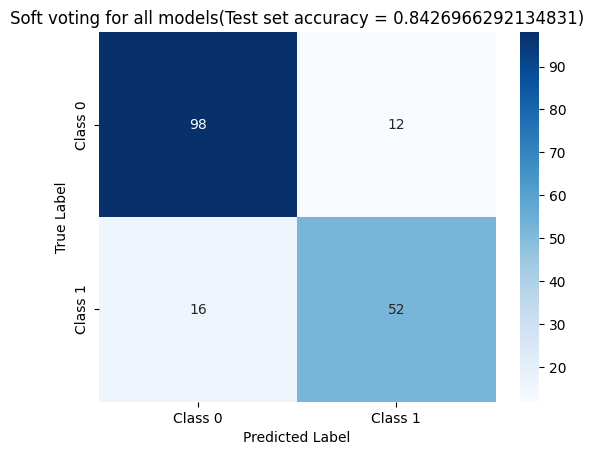

In [140]:
print(classification_report(y_test,y_pred_soft_all))
cm = confusion_matrix(y_test,y_pred_soft_all)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
accuracy = accuracy_score(y_test,y_pred_soft_all)
plt.title(f"Soft voting for all models(Test set accuracy = {accuracy})")
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       110
           1       0.81      0.76      0.79        68

    accuracy                           0.84       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



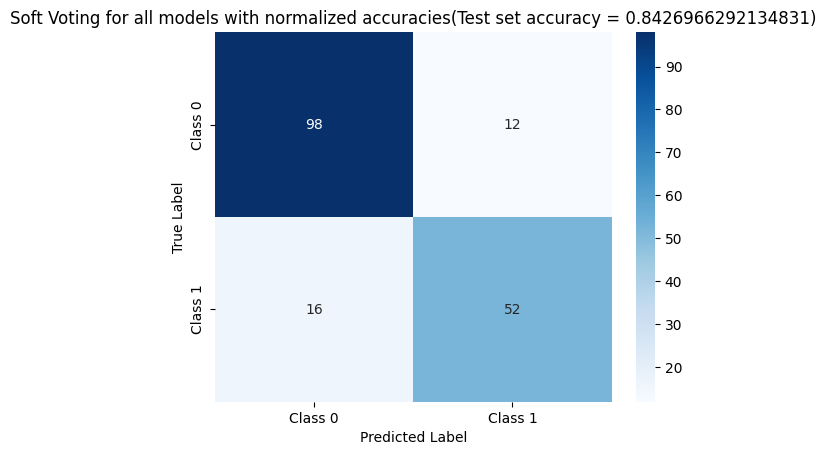

In [141]:
print(classification_report(y_test,y_pred_soft_all_norm))
cm = confusion_matrix(y_test,y_pred_soft_all_norm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
accuracy = accuracy_score(y_test,y_pred_soft_all_norm)
plt.title(f"Soft Voting for all models with normalized accuracies(Test set accuracy = {accuracy})")
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       110
           1       0.81      0.79      0.80        68

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



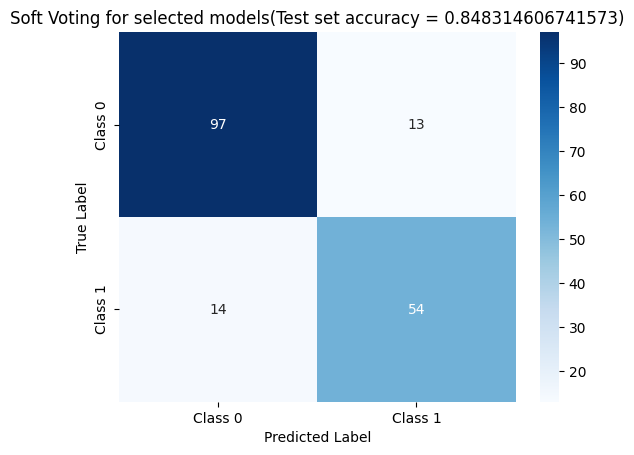

In [142]:
print(classification_report(y_test,y_pred_soft_selected))
cm = confusion_matrix(y_test,y_pred_soft_selected)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
accuracy = accuracy_score(y_test,y_pred_soft_selected)
plt.title(f"Soft Voting for selected models(Test set accuracy = {accuracy})")
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       110
           1       0.81      0.79      0.80        68

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



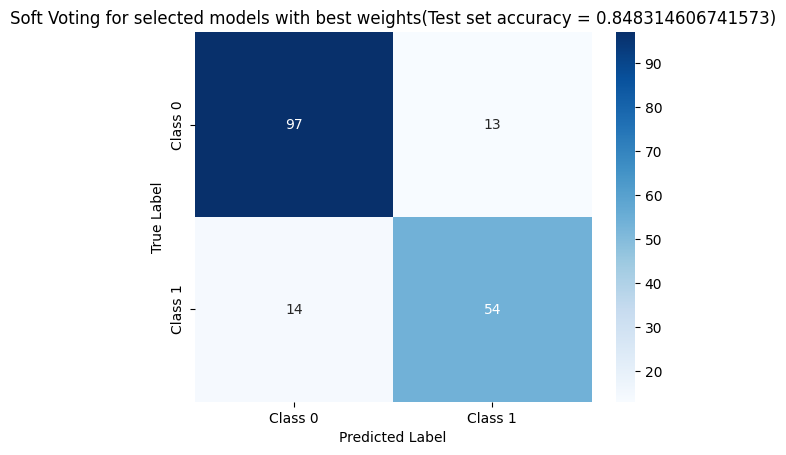

In [143]:
print(classification_report(y_test,y_pred_soft_selected_norm))
cm = confusion_matrix(y_test,y_pred_soft_selected_norm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
accuracy = accuracy_score(y_test,y_pred_soft_selected_norm)
plt.title(f"Soft Voting for selected models with best weights(Test set accuracy = {accuracy})")
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       110
           1       0.86      0.74      0.79        68

    accuracy                           0.85       178
   macro avg       0.86      0.83      0.84       178
weighted avg       0.85      0.85      0.85       178



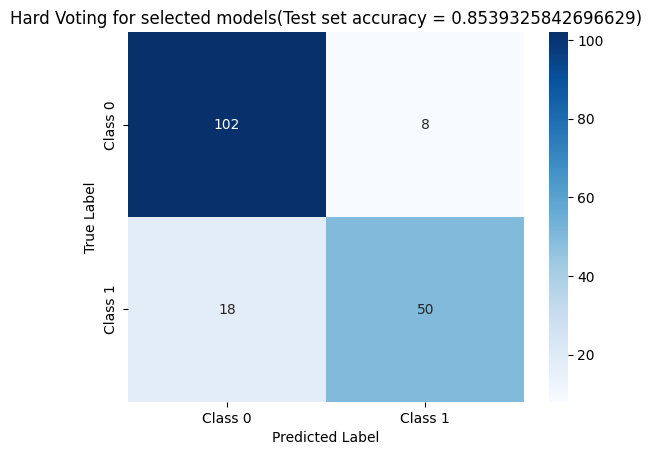

In [144]:
print(classification_report(y_test,y_pred_hard_selected))
cm = confusion_matrix(y_test,y_pred_hard_selected)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
accuracy = accuracy_score(y_test,y_pred_hard_selected)
plt.title(f"Hard Voting for selected models(Test set accuracy = {accuracy})")
plt.show()

Hard voting for selected models has got the highest test accuracy

# **Submission Preparation**

In [145]:
y_sub_1 = model_soft_all.predict(data_test).astype(int)
y_sub_2 = model_soft_all_norm.predict(data_test).astype(int)
y_sub_3 = model_soft_selected.predict(data_test).astype(int)
y_sub_4 = model_soft_selected_norm.predict(data_test).astype(int)
y_sub_5 = model_hard_selected.predict(data_test).astype(int)

In [146]:
submission_1 = pd.DataFrame(
    data = {
        'PassengerId': passenger_id,
        'Survived': y_sub_1
        
    }
)
submission_2 = pd.DataFrame(
    data = {
        'PassengerId': passenger_id,
        'Survived': y_sub_2
        
    }
)
submission_3 = pd.DataFrame(
    data = {
        'PassengerId': passenger_id,
        'Survived': y_sub_3
        
    }
)
submission_4 = pd.DataFrame(
    data = {
        'PassengerId': passenger_id,
        'Survived': y_sub_4
        
    }
)
submission_5 = pd.DataFrame(
    data = {
        'PassengerId': passenger_id,
        'Survived': y_sub_5
        
    }
)

In [148]:
submission_1.to_csv("submission_1.csv",index= False) #5
submission_2.to_csv("submission_2.csv",index= False) #4
submission_3.to_csv("submission_3.csv",index= False) #3
submission_4.to_csv("submission_4.csv",index= False) #2
submission_5.to_csv("submission_5.csv",index= False) #1 accuracy order